# Capstone Project 2: Supermarket Customer Data Analysis

**Customer Behavior Pattern Analysis to Increase Supermarket Revenue Based on Customer Segmentation, Product Preferences, Campaign Optimization, and Distribution Channel Adjustments**

Tigfhar Ahmadjayadi
JCDS-2304

Ver: 16 May 2024

# 1. INTRODUCTION

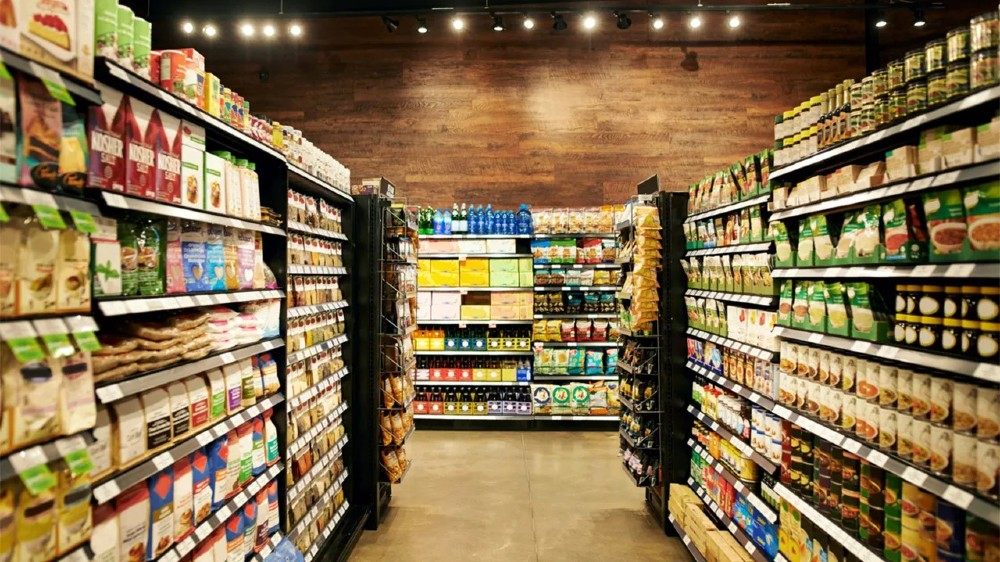

source: https://beritausaha.com/wp-content/uploads/2022/07/Grocery-Store-iStock.jpg

## 1.1. BACKGROUND CONTEXT

A supermarket sees an opportunity to increase its revenue in the era of digitalization. By utilizing customer data collected over the past two years, the supermarket aims to analyze customer behavior patterns in the hope of discovering ways to boost their revenue in the coming years.

## 1.2. STAKEHOLDER

The analysis is directed toward all parties involved in the supermarket's business activities, where each party is expected to extract information and benefit from the results of this analysis. Specifically, this analysis is tailored for the supermarket's **Business Development** team.

## 1.3. PROBLEM STATEMENT

**Key Business Question:** <br>

`1. How can the supermarket increase its revenue based on customer behavior patterns over the past two years?`

**Data-Driven Research Questions:**<br>

`1. What are the characteristics of the supermarket's potential customers?`<br>
    1.1 How can the supermarket segment its customers to identify potential targets for increasing sales?<br>
    1.2 What is the profile of potential customer segments to target for increasing sales?<br>

`2. How can the supermarket optimize sales within the potential customer segment?`<br>
    2.1 What are the appropriate campaign strategies for the potential customer segment?<br>
    2.2 What products are suitable to offer to the potential customer segment?<br>
    2.3 What distribution channels are best suited to serve the potential customer segment?<br>

## 1.4. GOALS

The main objective of this analysis is to increase the supermarket's revenue based on customer behavior patterns over the past two years by understanding the characteristics of potential customers to be targeted for boosting sales.

## 1.5. DATA OVERVIEW

`Data Source`

The dataset used is titled "Supermarket Customer" in .csv (Comma-Separated Values) format, which can be accessed via the following link:

https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK

The dataset contains customer profiles, including demographics, purchase history, and marketing history. It consists of 29 columns divided into 4 categories: people, product, promotion, and place, with the following details:

| Column               | Description                                              |
|-----------------------|----------------------------------------------------------|
| ID                   | Unique customer ID number                                |
| Year_Birth           | Customer's year of birth                                 |
| Education            | Customer's education level                               |
| Marital_Status       | Customer's marital status                                |
| Income               | Customer's annual household income                       |
| Kidhome              | Number of children in the customer's household           |
| Teenhome             | Number of teenagers in the customer's household          |
| Dt_Customer          | Customer's registration date with the company            |
| Recency              | Number of days since the customer's last purchase        |
| Complain             | Status of customer complaints in the last 2 years (Y/N) |
| MntWines             | Amount spent on wine by the customer in the last 2 years |
| MntFruits            | Amount spent on fruits by the customer in the last 2 years |
| MntMeatProducts      | Amount spent on meat by the customer in the last 2 years |
| MntFishProducts      | Amount spent on fish by the customer in the last 2 years |
| MntSweetProducts     | Amount spent on sweets by the customer in the last 2 years |
| MntGoldProds         | Amount spent on gold products by the customer in the last 2 years |
| NumDealsPurchases    | Number of purchases made with discounts                  |
| AcceptedCmp1         | 1 if the customer accepted the offer in the first campaign, 0 otherwise |
| AcceptedCmp2         | 1 if the customer accepted the offer in the second campaign, 0 otherwise |
| AcceptedCmp3         | 1 if the customer accepted the offer in the third campaign, 0 otherwise |
| AcceptedCmp4         | 1 if the customer accepted the offer in the fourth campaign, 0 otherwise |
| AcceptedCmp5         | 1 if the customer accepted the offer in the fifth campaign, 0 otherwise |
| Response             | 1 if the customer accepted the offer in the latest campaign, 0 otherwise |
| NumWebPurchases      | Number of purchases made through the company's website   |
| NumCatalogPurchases  | Number of purchases made using catalogs                  |
| NumStorePurchases    | Number of purchases made directly in stores              |
| NumWebVisitsMonth    | Number of visits to the company's website in the last month |


# 2. DATA PREPROCESSING

**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

# Disabling all warnings
import warnings
warnings.filterwarnings("ignore")

## 2.1. DATA UNDERSTANDING

In [2]:
# Import raw dataset
df_raw = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df_raw 

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
# Create copy of dataset fo analysis
df = df_raw.copy()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
# Show the number of rows and columns
df.shape

(2240, 29)

In [5]:
# Show the name, data type, and non-null value from each collumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Show descriptive statistics for all numeric columns
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
# Show descriptive statistics for all categoric columns
df.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [8]:
# Find column names, number of unique values, and unique values

list_item = []

for column in df.columns:
    list_item.append([column,df[column].nunique(), df[column].unique()])

table_unique = pd.DataFrame(data=list_item, columns=['Nama Kolom','Jumlah Unique Value', 'Unique Value'], )

table_unique

Nama Kolom  Jumlah Unique Value  \
0                    ID                 2240   
1            Year_Birth                   59   
2             Education                    5   
3        Marital_Status                    8   
4                Income                 1974   
5               Kidhome                    3   
6              Teenhome                    3   
7           Dt_Customer                  663   
8               Recency                  100   
9              MntWines                  776   
10            MntFruits                  158   
11      MntMeatProducts                  558   
12      MntFishProducts                  182   
13     MntSweetProducts                  177   
14         MntGoldProds                  213   
15    NumDealsPurchases                   15   
16      NumWebPurchases                   15   
17  NumCatalogPurchases                   14   
18    NumStorePurchases                   14   
19    NumWebVisitsMonth                   16   
20         AcceptedCmp3                    2   
21         AcceptedCmp4                    2   
22         AcceptedCmp5                    2   
23         AcceptedCmp1                    2   
24         AcceptedCmp2                    2   
25             Complain                    2   
26        Z_CostContact                    1   
27            Z_Revenue                    1   
28             Response                    2   

                                         Unique Value  
0   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...  
1   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...  
2          [Graduation, PhD, Master, Basic, 2n Cycle]  
3   [Single, Together, Married, Divorced, Widow, A...  
4   [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...  
5                                           [0, 1, 2]  
6                                           [0, 1, 2]  
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...  
8   [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...  
9   [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...  
10  [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...  
11  [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...  
12  [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...  
13  [88, 1, 21, 3, 27, 42, 49, 2, 112, 5, 68, 13, ...  
14  [88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 1, 16, 3...  
15  [3, 2, 1, 5, 4, 15, 7, 0, 6, 9, 12, 8, 10, 13,...  
16  [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 27, 10, 9, 23,...  
17     [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11, 22]  
18     [4, 2, 10, 6, 7, 0, 3, 8, 5, 12, 9, 13, 11, 1]  
19  [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19,...  
20                                             [0, 1]  
21                                             [0, 1]  
22                                             [0, 1]  
23                                             [0, 1]  
24                                             [0, 1]  
25                                             [0, 1]  
26                                                [3]  
27                                               [11]  
28                                             [1, 0]

**FINDINGS**

Based on the analysis results in the "Data Understanding" phase, it can be seen that there is some information in the dataset that is inaccurate and needs to be addressed to optimize the analysis results. These include:<br>
1. `Column "Education"`<br> 
    Contains several inefficient values, such as similar values like "2n Cycle" and "Master", as well as "Graduation" and "Bachelor".<br>
2. `Column "Marital_Status"` <br>
    Contains several irrelevant values, such as values that are unrelated to the column name, like "Alone", "Absurd", and "YOLO".<br>
3. `Column "Dt_Customer"` <br>
    Has an incorrect data format, which is an object.<br>
4. `Column "Response"` <br>
    Has an ineffective name, as it may cause confusion between the name, definition, and values contained within it.<br>
5. `Columns "Z_CostContact" and "Z_Revenue"` 
    Do not have clear meanings, as there is no definitive definition for these columns in the supplementary documents, and the values within them cannot be interpreted.<br>

## 2.2 DATA REFORMATING

In [9]:
# Adjust several value names in the Education column
df['Education']=df['Education'].replace({'2n Cycle':'Master', 'Graduation':'Bachelor'})

In [10]:
# Show unique values in the Marital_Status column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
# Show the number of 'Absurd' and 'YOLO' value
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
# Delete customer data with 'Absurd' and 'YOLO' marital status
df = df.drop(df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index)
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [13]:
# Adjust several value names in the Marital_Status column
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [14]:
# Change data type for Dt_Customer column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] 

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2236, dtype: datetime64[ns]

In [15]:
# Change the name of 'Response' column into 'AcceptedCmp6'
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace= True)

In [16]:
# Delete Z_CostContact and Z_Revenue column
df.drop(['Z_CostContact', 'Z_Revenue'], axis= 1, inplace = True)
df

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957  Bachelor         Single  58138.0        0         0   
1      2174        1954  Bachelor         Single  46344.0        1         1   
2      4141        1965  Bachelor       Together  71613.0        0         0   
3      6182        1984  Bachelor       Together  26646.0        1         0   
4      5324        1981       PhD        Married  58293.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10870        1967  Bachelor        Married  61223.0        0         1   
2236   4001        1946       PhD       Together  64014.0        2         1   
2237   7270        1981  Bachelor       Divorced  56981.0        0         0   
2238   8235        1956    Master       Together  69245.0        0         1   
2239   9405        1954       PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0     2012-09-04       58       635  ...                   10   
1     2014-03-08       38        11  ...                    1   
2     2013-08-21       26       426  ...                    2   
3     2014-02-10       26        11  ...                    0   
4     2014-01-19       94       173  ...                    3   
...          ...      ...       ...  ...                  ...   
2235  2013-06-13       46       709  ...                    3   
2236  2014-06-10       56       406  ...                    2   
2237  2014-01-25       91       908  ...                    3   
2238  2014-01-24        8       428  ...                    5   
2239  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  AcceptedCmp6  
0                0             0             0         0             1  
1                0             0             0         0             0  
2                0             0             0         0             0  
3                0             0             0         0             0  
4                0             0             0         0             0  
...            ...           ...           ...       ...           ...  
2235             0             0             0         0             0  
2236             0             1             0         0             0  
2237             0             0             0         0             0  
2238             0             0             0         0             0  
2239             0             0             0         0             1  

[2236 rows x 27 columns]

**FINDINGS**

Based on the analysis results in the "Data Understanding" phase, several changes have been applied, including:<br>
1. Column `"Education"` <br>
    Merged "2n Cycle" into "Master" and "Graduation" into "Bachelor".<br><br>
2. Column  `"Marital_Status"`<br>
    Removed data containing the values "Alone", "Absurd", and "YOLO".
<br><br>
3. Column  `"Dt_Customer"` <br>
    Changed the data format to datetime.
<br><br>
4. Column  `"Response"` <br>
    Renamed the column to "AcceptedCmp6".<br><br>
5. Column  `"Z_CostContact"` dan `kolom "Z_Revenue"`<br> 
    Removed both columns.<br><br>
    
Reference:
- Point 1: Teichler, U. (2009). Internationalisation of higher education: European experiences. Asia Pacific Educ, Rev. 10, 93–106. https://doi.org/10.1007/s12564-009-9002-7

## 2.3 FEATURE ENGINEERING

In [17]:
# Create new column: 'Age'
df['Age']=(df['Dt_Customer'].dt.year-df['Year_Birth'])

In [18]:
# Create new column: 'Partner'
df['Partner_Status'] = df['Marital_Status'].apply(lambda status: 'With Partner' if status in ['Together', 'Married'] else 'Without Partner')

In [19]:
# Create new column: 'Num_Child'
df['Num_Child'] = df['Kidhome'] + df['Teenhome']

In [20]:
# Create new column: 'Frequency'
df['Frequency'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']
df

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957  Bachelor         Single  58138.0        0         0   
1      2174        1954  Bachelor         Single  46344.0        1         1   
2      4141        1965  Bachelor       Together  71613.0        0         0   
3      6182        1984  Bachelor       Together  26646.0        1         0   
4      5324        1981       PhD        Married  58293.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10870        1967  Bachelor        Married  61223.0        0         1   
2236   4001        1946       PhD       Together  64014.0        2         1   
2237   7270        1981  Bachelor       Divorced  56981.0        0         0   
2238   8235        1956    Master       Together  69245.0        0         1   
2239   9405        1954       PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0     2012-09-04       58       635  ...             0             0   
1     2014-03-08       38        11  ...             0             0   
2     2013-08-21       26       426  ...             0             0   
3     2014-02-10       26        11  ...             0             0   
4     2014-01-19       94       173  ...             0             0   
...          ...      ...       ...  ...           ...           ...   
2235  2013-06-13       46       709  ...             0             0   
2236  2014-06-10       56       406  ...             0             0   
2237  2014-01-25       91       908  ...             1             0   
2238  2014-01-24        8       428  ...             0             0   
2239  2012-10-15       40        84  ...             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  AcceptedCmp6  Age  \
0                0             0         0             1   55   
1                0             0         0             0   60   
2                0             0         0             0   48   
3                0             0         0             0   30   
4                0             0         0             0   33   
...            ...           ...       ...           ...  ...   
2235             0             0         0             0   46   
2236             1             0         0             0   68   
2237             0             0         0             0   33   
2238             0             0         0             0   58   
2239             0             0         0             1   58   

       Partner_Status  Num_Child  Frequency  
0     Without Partner          0         22  
1     Without Partner          2          4  
2        With Partner          0         20  
3        With Partner          1          6  
4        With Partner          1         14  
...               ...        ...        ...  
2235     With Partner          1         16  
2236     With Partner          3         15  
2237  Without Partner          0         18  
2238     With Partner          1         21  
2239     With Partner          2          8  

[2236 rows x 31 columns]

In [21]:
# Create new column: 'Monetary'
df['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df ['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957  Bachelor         Single  58138.0        0         0   
1      2174        1954  Bachelor         Single  46344.0        1         1   
2      4141        1965  Bachelor       Together  71613.0        0         0   
3      6182        1984  Bachelor       Together  26646.0        1         0   
4      5324        1981       PhD        Married  58293.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10870        1967  Bachelor        Married  61223.0        0         1   
2236   4001        1946       PhD       Together  64014.0        2         1   
2237   7270        1981  Bachelor       Divorced  56981.0        0         0   
2238   8235        1956    Master       Together  69245.0        0         1   
2239   9405        1954       PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0     2012-09-04       58       635  ...             0             0   
1     2014-03-08       38        11  ...             0             0   
2     2013-08-21       26       426  ...             0             0   
3     2014-02-10       26        11  ...             0             0   
4     2014-01-19       94       173  ...             0             0   
...          ...      ...       ...  ...           ...           ...   
2235  2013-06-13       46       709  ...             0             0   
2236  2014-06-10       56       406  ...             0             1   
2237  2014-01-25       91       908  ...             0             0   
2238  2014-01-24        8       428  ...             0             0   
2239  2012-10-15       40        84  ...             0             0   

      AcceptedCmp2  Complain  AcceptedCmp6  Age   Partner_Status  Num_Child  \
0                0         0             1   55  Without Partner          0   
1                0         0             0   60  Without Partner          2   
2                0         0             0   48     With Partner          0   
3                0         0             0   30     With Partner          1   
4                0         0             0   33     With Partner          1   
...            ...       ...           ...  ...              ...        ...   
2235             0         0             0   46     With Partner          1   
2236             0         0             0   68     With Partner          3   
2237             0         0             0   33  Without Partner          0   
2238             0         0             0   58     With Partner          1   
2239             0         0             1   58     With Partner          2   

      Frequency  Monetary  
0            22      1617  
1             4        27  
2            20       776  
3             6        53  
4            14       422  
...         ...       ...  
2235         16      1341  
2236         15       444  
2237         18      1241  
2238         21       843  
2239          8       172  

[2236 rows x 32 columns]

In [22]:
# Create new column: 'Total_Campaign'
df['Total_Campaign']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp6']

In [23]:
# Rearrange column's order
df = df [['ID', 'Dt_Customer', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Partner_Status', 'Num_Child', 'Kidhome', 'Teenhome', 'Income', 'Recency', 'Frequency', 'Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6','Total_Campaign', 'Complain']].reset_index()

**FINDINGS**

Based on the information obtained in the "Data Understanding" phase, several columns were created to help maximize the analysis to be performed, including: <br>
1. Column `"Age"`<br>
Contains information on the customer's age when they first made a transaction. This column was created by calculating the time difference between the first transaction ("Dt_Customer") and the birth year ("Year_Birth").<br><br>
2. Column `"Partner_Status"`<br>
Contains information on whether the customer lives with a partner or not. It is an optimization of marital status, where customers who are married or live with someone but are not married are categorized as "With Partner," while customers who are divorced, widowed, or live alone are categorized as "Without Partner."<br><br>
3. Column `"Num_Child"`<br>
Contains information on the number of children the customer has, calculated by summing up the number of children ("Kidhome") and teenagers ("Teenhome") in the customer's household.<br><br>
4. Columns `"Frequency" and "Monetary"`<br>
The "Frequency" column contains information on the number of transactions made by the customer, based on the number of transactions across each distribution channel ('NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases'). The "Monetary" column contains information on the total transaction amount spent by the customer across all purchased products ('MntGoldProds', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumStorePurchases'). These two columns will later be used for customer segmentation using the RFM method.

## 2.4 MISSING VALUES CHECK

In [24]:
# Show the number of missing values in the dataset
pd.DataFrame(data = df.isna().sum(),
            columns = ['Missing Values'])

Missing Values
index                             0
ID                                0
Dt_Customer                       0
Age                               0
Year_Birth                        0
Education                         0
Marital_Status                    0
Partner_Status                    0
Num_Child                         0
Kidhome                           0
Teenhome                          0
Income                           24
Recency                           0
Frequency                         0
Monetary                          0
MntGoldProds                      0
MntWines                          0
MntMeatProducts                   0
MntFishProducts                   0
MntFruits                         0
MntSweetProducts                  0
NumWebVisitsMonth                 0
NumWebPurchases                   0
NumStorePurchases                 0
NumCatalogPurchases               0
NumDealsPurchases                 0
AcceptedCmp1                      0
AcceptedCmp2                      0
AcceptedCmp3                      0
AcceptedCmp4                      0
AcceptedCmp5                      0
AcceptedCmp6                      0
Total_Campaign                    0
Complain                          0

In [25]:
# Show customer datas with NaN value in Income
df[df['Income'].isna()]

index     ID Dt_Customer  Age  Year_Birth Education Marital_Status  \
10       10   1994  2013-11-15   30        1983  Bachelor        Married   
27       27   5255  2013-02-20   27        1986  Bachelor         Single   
43       43   7281  2013-11-05   54        1959       PhD         Single   
48       48   7244  2014-01-01   63        1951  Bachelor         Single   
58       58   8557  2013-06-17   31        1982  Bachelor         Single   
71       71  10629  2012-09-14   39        1973    Master        Married   
90       90   8996  2012-11-19   55        1957       PhD        Married   
91       91   9235  2014-05-27   57        1957  Bachelor         Single   
92       92   5798  2013-11-23   40        1973    Master       Together   
128     128   8268  2013-07-11   52        1961       PhD        Married   
133     133   1295  2013-08-11   50        1963  Bachelor        Married   
312     312   2437  2013-06-03   24        1989  Bachelor        Married   
319     319   2863  2013-08-23   43        1970  Bachelor         Single   
1379   1379  10475  2013-04-01   43        1970    Master       Together   
1382   1382   2902  2012-09-03   54        1958  Bachelor       Together   
1383   1383   4345  2014-01-12   50        1964    Master         Single   
1386   1386   3769  2014-03-02   42        1972       PhD       Together   
2059   2059   7187  2013-05-18   44        1969    Master       Together   
2061   2061   1612  2013-05-31   32        1981       PhD         Single   
2078   2078   5079  2013-03-03   42        1971  Bachelor        Married   
2079   2079  10339  2013-06-23   59        1954    Master       Together   
2081   2081   3117  2013-10-18   58        1955  Bachelor         Single   
2084   2084   5250  2013-10-30   70        1943    Master          Widow   
2224   2228   8720  2012-08-12   34        1978    Master       Together   

       Partner_Status  Num_Child  Kidhome  ...  NumCatalogPurchases  \
10       With Partner          1        1  ...                    0   
27    Without Partner          1        1  ...                    0   
43    Without Partner          0        0  ...                    3   
48    Without Partner          3        2  ...                    1   
58    Without Partner          1        1  ...                    0   
71       With Partner          1        1  ...                    0   
90       With Partner          3        2  ...                    2   
91    Without Partner          2        1  ...                    0   
92       With Partner          0        0  ...                    4   
128      With Partner          1        0  ...                    1   
133      With Partner          1        0  ...                    5   
312      With Partner          0        0  ...                    5   
319   Without Partner          3        1  ...                    3   
1379     With Partner          1        0  ...                    2   
1382     With Partner          2        1  ...                    0   
1383  Without Partner          2        1  ...                    0   
1386     With Partner          1        1  ...                    0   
2059     With Partner          2        1  ...                   10   
2061  Without Partner          1        1  ...                    0   
2078     With Partner          2        1  ...                    1   
2079     With Partner          1        0  ...                    1   
2081  Without Partner          1        0  ...                    1   
2084  Without Partner          0        0  ...                    5   
2224     With Partner          0        0  ...                    0   

      NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
10                    1             0             0             0   
27                    0             0             0             0   
43                    1             0             0             0   
48                    3             0             0  

In [26]:
# Delete data with NaN income
df.dropna(subset=['Income'],inplace=True)
df

index     ID Dt_Customer  Age  Year_Birth Education Marital_Status  \
0         0   5524  2012-09-04   55        1957  Bachelor         Single   
1         1   2174  2014-03-08   60        1954  Bachelor         Single   
2         2   4141  2013-08-21   48        1965  Bachelor       Together   
3         3   6182  2014-02-10   30        1984  Bachelor       Together   
4         4   5324  2014-01-19   33        1981       PhD        Married   
...     ...    ...         ...  ...         ...       ...            ...   
2231   2235  10870  2013-06-13   46        1967  Bachelor        Married   
2232   2236   4001  2014-06-10   68        1946       PhD       Together   
2233   2237   7270  2014-01-25   33        1981  Bachelor       Divorced   
2234   2238   8235  2014-01-24   58        1956    Master       Together   
2235   2239   9405  2012-10-15   58        1954       PhD        Married   

       Partner_Status  Num_Child  Kidhome  ...  NumCatalogPurchases  \
0     Without Partner          0        0  ...                   10   
1     Without Partner          2        1  ...                    1   
2        With Partner          0        0  ...                    2   
3        With Partner          1        1  ...                    0   
4        With Partner          1        1  ...                    3   
...               ...        ...      ...  ...                  ...   
2231     With Partner          1        0  ...                    3   
2232     With Partner          3        2  ...                    2   
2233  Without Partner          0        0  ...                    3   
2234     With Partner          1        0  ...                    5   
2235     With Partner          2        1  ...                    1   

      NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2231                  2             0             0             0   
2232                  7             1             0             0   
2233                  1             0             0             0   
2234                  2             0             0             0   
2235                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp6  Total_Campaign  Complain  
0                0             0             1               1         0  
1                0             0             0               0         0  
2                0             0             0               0         0  
3                0             0             0               0         0  
4                0             0             0               0         0  
...            ...           ...           ...             ...       ...  
2231             0             0             0               0         0  
2232             0             0             0               1         0  
2233             1             0             0               1         0  
2234             0             0             0               0         0  
2235             0             0             1               1         0  

[2212 rows x 34 columns]

**TEMUAN**

Based on the analysis results in the "Missing Value Check" phase, the following was found:<br>

1. Column `Income`<br>
There are missing or non-numeric values in the "Income" column. Since the proportion of these values is only 1% of the entire dataset, they were removed to ensure that the analysis results are more accurate.

## 2.5 DUPLICATE DATA CHECK

In [27]:
# Show duplicated datas
pd.DataFrame(df[df.duplicated()])

Empty DataFrame
Columns: [index, ID, Dt_Customer, Age, Year_Birth, Education, Marital_Status, Partner_Status, Num_Child, Kidhome, Teenhome, Income, Recency, Frequency, Monetary, MntGoldProds, MntWines, MntMeatProducts, MntFishProducts, MntFruits, MntSweetProducts, NumWebVisitsMonth, NumWebPurchases, NumStorePurchases, NumCatalogPurchases, NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp6, Total_Campaign, Complain]
Index: []

[0 rows x 34 columns]

**FINDINGS**

Based on the analysis results in the "Duplicate Data Check" phase, no columns with duplicate values were found.

## 2.6 NORMAL TEST

In [28]:
# Create variable containing the numeric column for normality test.

column_numeric = ['Year_Birth', 'Income', 'Recency', 'Frequency', 'Monetary','MntWines',
'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds',  'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth']

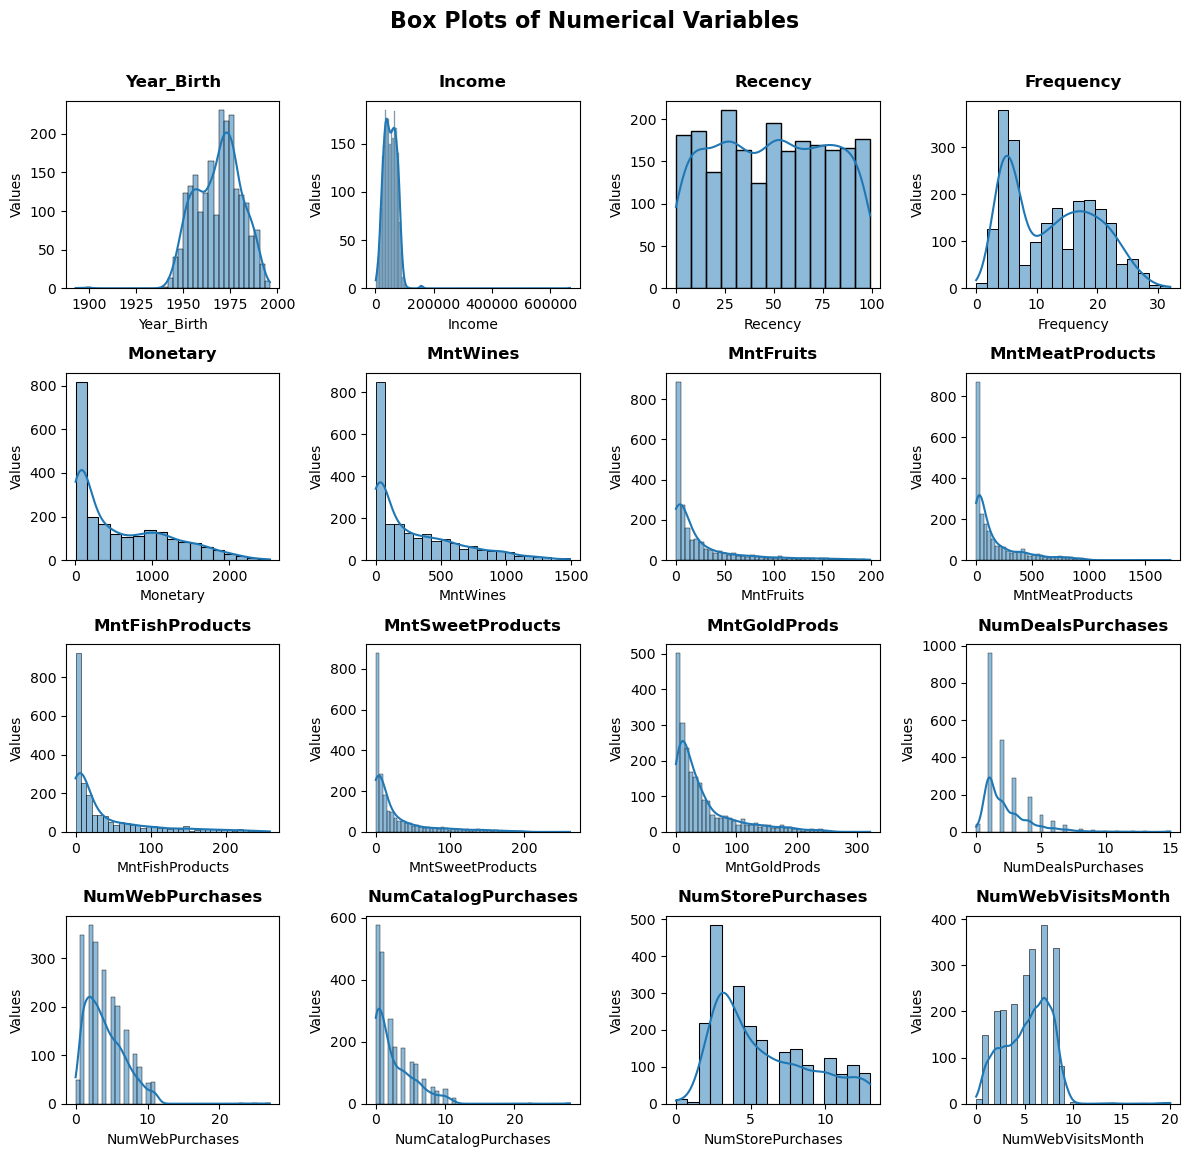

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

axes = axes.flatten()

for i, col in enumerate(column_numeric):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [30]:
from scipy.stats import shapiro

for column in column_numeric:
    stat, p = shapiro(df[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Column '{column}' is normally distributed (p-value: {p:.4f})")
    else:
        print(f"Column '{column}' is not normally distributed (p-value: {p:.4f})")

Column 'Year_Birth' is not normally distributed (p-value: 0.0000)
Column 'Income' is not normally distributed (p-value: 0.0000)
Column 'Recency' is not normally distributed (p-value: 0.0000)
Column 'Frequency' is not normally distributed (p-value: 0.0000)
Column 'Monetary' is not normally distributed (p-value: 0.0000)
Column 'MntWines' is not normally distributed (p-value: 0.0000)
Column 'MntFruits' is not normally distributed (p-value: 0.0000)
Column 'MntMeatProducts' is not normally distributed (p-value: 0.0000)
Column 'MntFishProducts' is not normally distributed (p-value: 0.0000)
Column 'MntSweetProducts' is not normally distributed (p-value: 0.0000)
Column 'MntGoldProds' is not normally distributed (p-value: 0.0000)
Column 'NumDealsPurchases' is not normally distributed (p-value: 0.0000)
Column 'NumWebPurchases' is not normally distributed (p-value: 0.0000)
Column 'NumCatalogPurchases' is not normally distributed (p-value: 0.0000)
Column 'NumStorePurchases' is not normally distrib

**FINDINGS**

Based on the analysis results in the 'Normal Test' phase, it is known that all numeric columns in the dataset are not normally distributed.

## 2.7 HANDLING OUTLIER 

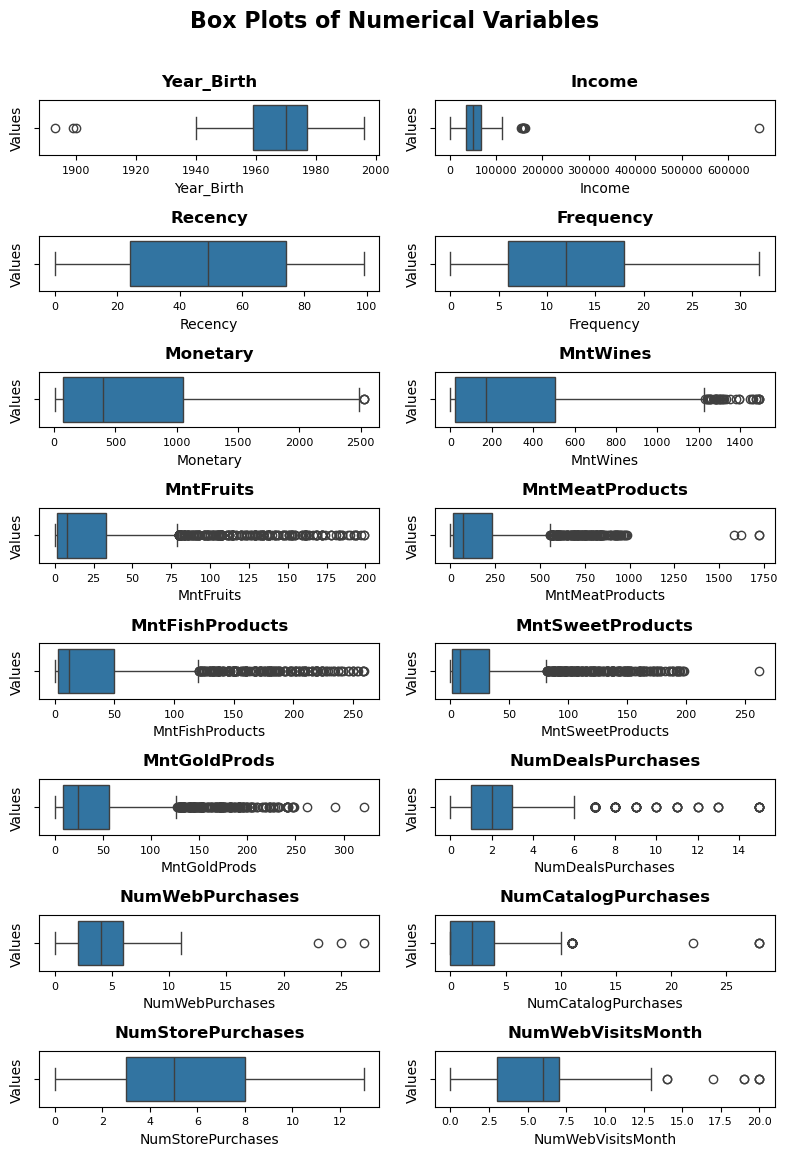

In [31]:
# Show outlier in numeric columns

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 12))

axes = axes.flatten()

for i, col in enumerate(column_numeric):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')
    
    # Reduce the font size of the x-axis labels
    axes[i].tick_params(axis='x', labelsize=8)

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [32]:
# Show outliers in Year_Birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Year_Birth'] < outlier_threshold_low) | (df['Year_Birth'] > outlier_threshold_high)]
outliers

index     ID Dt_Customer  Age  Year_Birth Education Marital_Status  \
192    192   7829  2013-09-26  113        1900    Master       Divorced   
239    239  11004  2014-05-17  121        1893    Master         Single   
339    339   1150  2013-09-26  114        1899       PhD       Together   

      Partner_Status  Num_Child  Kidhome  ...  NumCatalogPurchases  \
192  Without Partner          1        1  ...                    1   
239  Without Partner          1        0  ...                    0   
339     With Partner          0        0  ...                    6   

     NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
192                  1             0             0             0   
239                  1             0             0             0   
339                  1             0             0             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp6  Total_Campaign  Complain  
192             0             0             0               0         1  
239             0             0             0               0         0  
339             0             1             0               1         0  

[3 rows x 34 columns]

In [33]:
# Delete outliers in Year_Birth
df.drop(outliers.index, inplace=True)
df

index     ID Dt_Customer  Age  Year_Birth Education Marital_Status  \
0         0   5524  2012-09-04   55        1957  Bachelor         Single   
1         1   2174  2014-03-08   60        1954  Bachelor         Single   
2         2   4141  2013-08-21   48        1965  Bachelor       Together   
3         3   6182  2014-02-10   30        1984  Bachelor       Together   
4         4   5324  2014-01-19   33        1981       PhD        Married   
...     ...    ...         ...  ...         ...       ...            ...   
2231   2235  10870  2013-06-13   46        1967  Bachelor        Married   
2232   2236   4001  2014-06-10   68        1946       PhD       Together   
2233   2237   7270  2014-01-25   33        1981  Bachelor       Divorced   
2234   2238   8235  2014-01-24   58        1956    Master       Together   
2235   2239   9405  2012-10-15   58        1954       PhD        Married   

       Partner_Status  Num_Child  Kidhome  ...  NumCatalogPurchases  \
0     Without Partner          0        0  ...                   10   
1     Without Partner          2        1  ...                    1   
2        With Partner          0        0  ...                    2   
3        With Partner          1        1  ...                    0   
4        With Partner          1        1  ...                    3   
...               ...        ...      ...  ...                  ...   
2231     With Partner          1        0  ...                    3   
2232     With Partner          3        2  ...                    2   
2233  Without Partner          0        0  ...                    3   
2234     With Partner          1        0  ...                    5   
2235     With Partner          2        1  ...                    1   

      NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2231                  2             0             0             0   
2232                  7             1             0             0   
2233                  1             0             0             0   
2234                  2             0             0             0   
2235                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp6  Total_Campaign  Complain  
0                0             0             1               1         0  
1                0             0             0               0         0  
2                0             0             0               0         0  
3                0             0             0               0         0  
4                0             0             0               0         0  
...            ...           ...           ...             ...       ...  
2231             0             0             0               0         0  
2232             0             0             0               1         0  
2233             1             0             0               1         0  
2234             0             0             0               0         0  
2235             0             0             1               1         0  

[2209 rows x 34 columns]

In [34]:
# Show outlier in Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < outlier_threshold_low) | (df['Income'] > outlier_threshold_high)]
outliers['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2131    156924.0
2229    666666.0
Name: Income, dtype: float64

In [35]:
df.describe()

index            ID                    Dt_Customer          Age  \
count  2209.000000   2209.000000                           2209  2209.000000   
mean   1121.177909   5586.274332  2013-07-10 12:25:05.839746560    44.120869   
min       0.000000      0.000000            2012-07-30 00:00:00    16.000000   
25%     568.000000   2815.000000            2013-01-16 00:00:00    36.000000   
50%    1120.000000   5455.000000            2013-07-08 00:00:00    43.000000   
75%    1676.000000   8420.000000            2013-12-31 00:00:00    54.000000   
max    2239.000000  11191.000000            2014-06-29 00:00:00    73.000000   
std     641.891899   3246.381310                            NaN    11.730996   

        Year_Birth    Num_Child      Kidhome     Teenhome         Income  \
count  2209.000000  2209.000000  2209.000000  2209.000000    2209.000000   
mean   1968.908103     0.948393     0.442734     0.505659   52221.801720   
min    1940.000000     0.000000     0.000000     0.000000    1730.000000   
25%    1959.000000     0.000000     0.000000     0.000000   35196.000000   
50%    1970.000000     1.000000     0.000000     0.000000   51373.000000   
75%    1977.000000     1.000000     1.000000     1.000000   68487.000000   
max    1996.000000     3.000000     2.000000     2.000000  666666.000000   
std      11.696191     0.749431     0.537121     0.544313   25193.001847   

           Recency  ...  NumCatalogPurchases  NumDealsPurchases  AcceptedCmp1  \
count  2209.000000  ...          2209.000000        2209.000000   2209.000000   
mean     49.045722  ...             2.668628           2.323223      0.063830   
min       0.000000  ...             0.000000           0.000000      0.000000   
25%      24.000000  ...             0.000000           1.000000      0.000000   
50%      49.000000  ...             2.000000           2.000000      0.000000   
75%      74.000000  ...             4.000000           3.000000      0.000000   
max      99.000000  ...            28.000000          15.000000      1.000000   
std      28.934289  ...             2.924738           1.924200      0.244505   

       AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp6  \
count   2209.000000   2209.000000   2209.000000   2209.000000   2209.000000   
mean       0.013581      0.073789      0.074242      0.072431      0.149842   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   
std        0.115769      0.261486      0.262223      0.259259      0.356997   

       Total_Campaign     Complain  
count     2209.000000  2209.000000  
mean         0.447714     0.009054  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          1.000000     0.000000  
max          5.000000     1.000000  
std          0.891844     0.094742  

[8 rows x 31 columns]

In [36]:
# Delete outlier in Income
df.drop(outliers.index, inplace=True)
df

index     ID Dt_Customer  Age  Year_Birth Education Marital_Status  \
0         0   5524  2012-09-04   55        1957  Bachelor         Single   
1         1   2174  2014-03-08   60        1954  Bachelor         Single   
2         2   4141  2013-08-21   48        1965  Bachelor       Together   
3         3   6182  2014-02-10   30        1984  Bachelor       Together   
4         4   5324  2014-01-19   33        1981       PhD        Married   
...     ...    ...         ...  ...         ...       ...            ...   
2231   2235  10870  2013-06-13   46        1967  Bachelor        Married   
2232   2236   4001  2014-06-10   68        1946       PhD       Together   
2233   2237   7270  2014-01-25   33        1981  Bachelor       Divorced   
2234   2238   8235  2014-01-24   58        1956    Master       Together   
2235   2239   9405  2012-10-15   58        1954       PhD        Married   

       Partner_Status  Num_Child  Kidhome  ...  NumCatalogPurchases  \
0     Without Partner          0        0  ...                   10   
1     Without Partner          2        1  ...                    1   
2        With Partner          0        0  ...                    2   
3        With Partner          1        1  ...                    0   
4        With Partner          1        1  ...                    3   
...               ...        ...      ...  ...                  ...   
2231     With Partner          1        0  ...                    3   
2232     With Partner          3        2  ...                    2   
2233  Without Partner          0        0  ...                    3   
2234     With Partner          1        0  ...                    5   
2235     With Partner          2        1  ...                    1   

      NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2231                  2             0             0             0   
2232                  7             1             0             0   
2233                  1             0             0             0   
2234                  2             0             0             0   
2235                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp6  Total_Campaign  Complain  
0                0             0             1               1         0  
1                0             0             0               0         0  
2                0             0             0               0         0  
3                0             0             0               0         0  
4                0             0             0               0         0  
...            ...           ...           ...             ...       ...  
2231             0             0             0               0         0  
2232             0             0             0               1         0  
2233             1             0             0               1         0  
2234             0             0             0               0         0  
2235             0             0             1               1         0  

[2201 rows x 34 columns]

**FINDINGS**

Based on the analysis results in the "Handling Outlier" phase, it is known that there are several values categorized as "outliers" in each column of the dataset. Data with "outlier" values were then re-selected to separate the data considered anomalies, which were then removed to improve the accuracy of the data analysis, including:

1. Column `Year_Birth`
There is data showing customers' birth years in 1900 or even earlier. This can cause errors in analysis, and the customers' ages are no longer rational <br><br>

2. Column `Income`
There are customers with very high incomes compared to the average income of all customers. If this data is used, the analysis results will not represent the overall customer base.


# 3. DATA ANALYSIS

## 3.1 PEOPLE

`1. What are the characteristics of the supermarket's potential customers?`<br>

### 3.1.1 CUSTOMER SEGMENTATION

`1.1 How can the supermarket segment its customers to identify potential targets for increasing sales?`

In determining customer segmentation, research is conducted using the RFM method, which divides customers into several segments based on *Recency*, *Frequency*, and *Monetary* values.

In [37]:
# Create an RFM dataframe variable.
df_RFM = df[['Recency', 'Frequency', 'Monetary']]

In [38]:
# Create segmentation for each RFM feature
df_RFM['R_Segmen'] = np.where(df_RFM['Recency'] > df_RFM['Recency'].median(), 0, 1)
df_RFM['F_Segmen'] = np.where(df_RFM['Frequency'] > df_RFM['Frequency'].median(), 1, 0)
df_RFM['M_Segmen'] = np.where(df_RFM['Monetary'] > df_RFM['Monetary'].median(), 1, 0)

In [39]:
# Create RFM_Score feature
df_RFM['RFM_Score'] = df_RFM['R_Segmen'].astype(str) + df_RFM['F_Segmen'].astype(str) + df_RFM['M_Segmen'].astype(str)

In [40]:
# Create segmentation based on all RFM features
df_RFM['RFM_Segmen'] = np.where((df_RFM['R_Segmen']==1) & (df_RFM['F_Segmen']==1) & (df_RFM['M_Segmen']==1), 1,
                        np.where((df_RFM['R_Segmen']==0) & (df_RFM['F_Segmen']==1) & (df_RFM['M_Segmen']==1), 1,
                        np.where((df_RFM['R_Segmen']==1) & (df_RFM['F_Segmen']==0) & (df_RFM['M_Segmen']==1), 1,
                        np.where((df_RFM['R_Segmen']==1) & (df_RFM['F_Segmen']==1) & (df_RFM['M_Segmen']==0), 2,
                        np.where((df_RFM['R_Segmen']==0) & (df_RFM['F_Segmen']==0) & (df_RFM['M_Segmen']==1), 1,
                        np.where((df_RFM['R_Segmen']==0) & (df_RFM['F_Segmen']==1) & (df_RFM['M_Segmen']==0), 2,
                        np.where((df_RFM['R_Segmen']==1) & (df_RFM['F_Segmen']==0) & (df_RFM['M_Segmen']==0), 2, 3
                        )))))))

df_RFM

Recency  Frequency  Monetary  R_Segmen  F_Segmen  M_Segmen RFM_Score  \
0          58         22      1617         0         1         1       011   
1          38          4        27         1         0         0       100   
2          26         20       776         1         1         1       111   
3          26          6        53         1         0         0       100   
4          94         14       422         0         1         1       011   
...       ...        ...       ...       ...       ...       ...       ...   
2231       46         16      1341         1         1         1       111   
2232       56         15       444         0         1         1       011   
2233       91         18      1241         0         1         1       011   
2234        8         21       843         1         1         1       111   
2235       40          8       172         1         0         0       100   

      RFM_Segmen  
0              1  
1              2  
2              1  
3              2  
4              1  
...          ...  
2231           1  
2232           1  
2233           1  
2234           1  
2235           2  

[2201 rows x 8 columns]

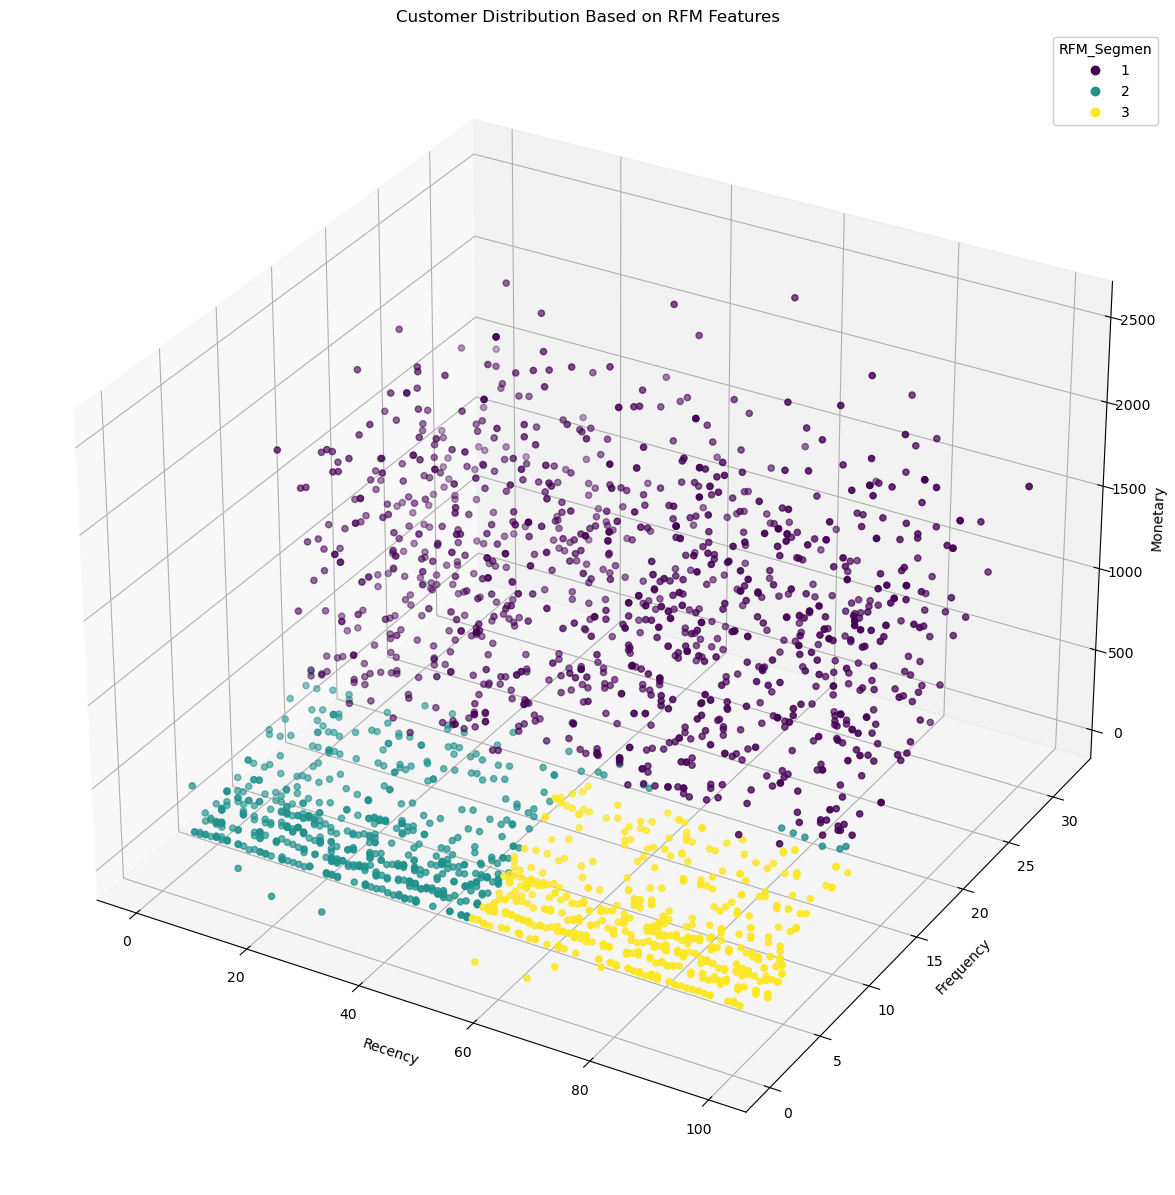

In [41]:
# View the distribution of customer segments based on recency, frequency, and monetary features
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and axis
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

# Scatter plot with hue
scatter = ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df_RFM['RFM_Segmen'], cmap='viridis')

# Set labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title='RFM_Segmen')
ax.add_artist(legend1)

# Set title
plt.title('Customer Distribution Based on RFM Features')

# Show plot
plt.show()

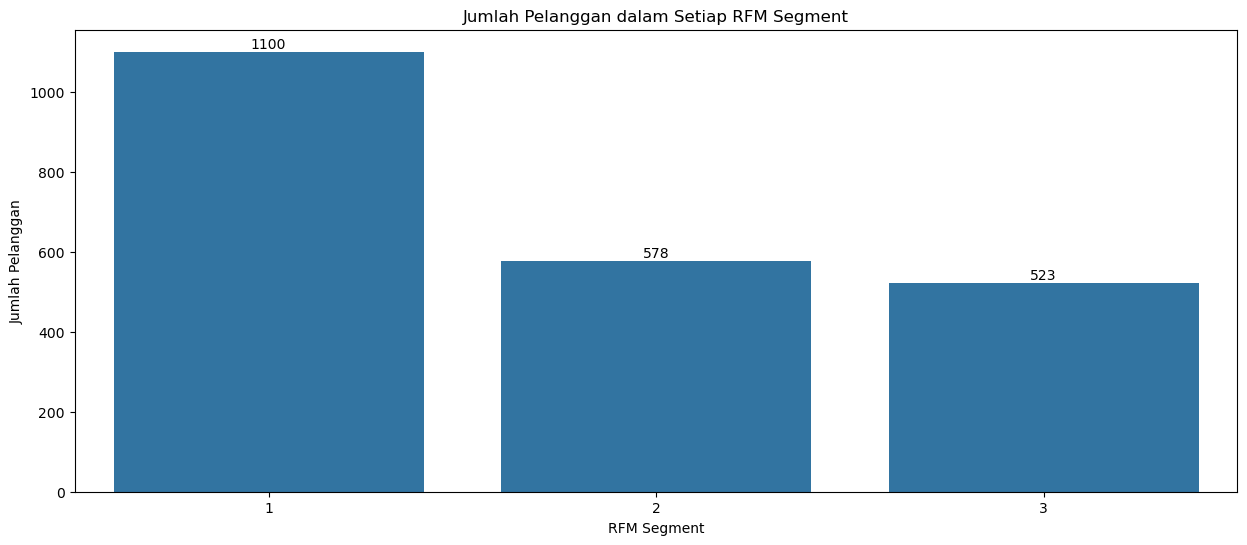

In [42]:
# Show the number of customers in each RFM segment.

# Get the count of each RFM segment
segment_counts = df_RFM['RFM_Segmen'].value_counts()

# Sort segments by count
ordered_segments = segment_counts.index

# Create the countplot with custom palette and sorted segments
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='RFM_Segmen', data=df_RFM)
plt.title('Jumlah Pelanggan dalam Setiap RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Jumlah Pelanggan')

# Add labels to each bar.
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

plt.show()

In [43]:
# Calculate the number of customers in each RFM segment
segment_counts = df_RFM['RFM_Segmen'].value_counts()

# Create a DataFrame from the number of customers
df_segment_counts = pd.DataFrame(segment_counts)
df_segment_counts.columns = ['Count']

# Sort the DataFrame based on RFM segments
df_segment_counts = df_segment_counts.sort_index()

# Add a total row
df_segment_counts.loc['Total'] = df_segment_counts['Count'].sum()

df_segment_counts = df_segment_counts.T
df_segment_counts

RFM_Segmen     1    2    3  Total
Count       1100  578  523   2201

In [44]:
# Combine the main dataframe variable with the RFM dataframe
df_concat_RFM = pd.concat([df, df_RFM['RFM_Segmen']], axis=1)

In [45]:
# Save the cleaned data as a CSV file
df_concat_RFM.to_csv('Supermarket Customer Cleaned.csv', index=False)

**FINDINGS**

Based on the analysis results in the "Customer Segmentation" phase, supermarket customers can be grouped into 3 segments, as follows:

1. `Segment 1`<br> 
This segment consists of customers with above-average *monetary* values, meaning customers who tend to make large transactions. It includes customers with RFM_Scores of 111, 011, 101, and 001. <br><br>
2. `Segment 2`<br>
This segment consists of customers with above-average *frequency* and/or *recency* values, meaning customers who tend to make frequent transactions and/or have made recent transactions. It includes customers with RFM_Scores of 110, 010, and 100. <br><br>
3. `Segment 3`<br>
This segment consists of customers with below-average *recency*, *frequency*, and *monetary* values, meaning customers who tend to have not made transactions for a long time, make infrequent transactions, and have low transaction amounts. It includes customers with RFM_Score 000.

### 3.1.2 Potential Customer Profile

`1.2 What is the profile of potential customer segments to target for increasing sales?![image.png](attachment:image.png)`

**RELATIONSHIP BETWEEN RFM SEGMENT AND CUSTOMER DEMOGRAPHIC PROFILE**

To determine the relationship between customer segments and demographic profiles, **Bivariate Analysis** was conducted to explore whether there is any relationship or trend between customer segments and variables such as age, education, marital status, number of children, and income.

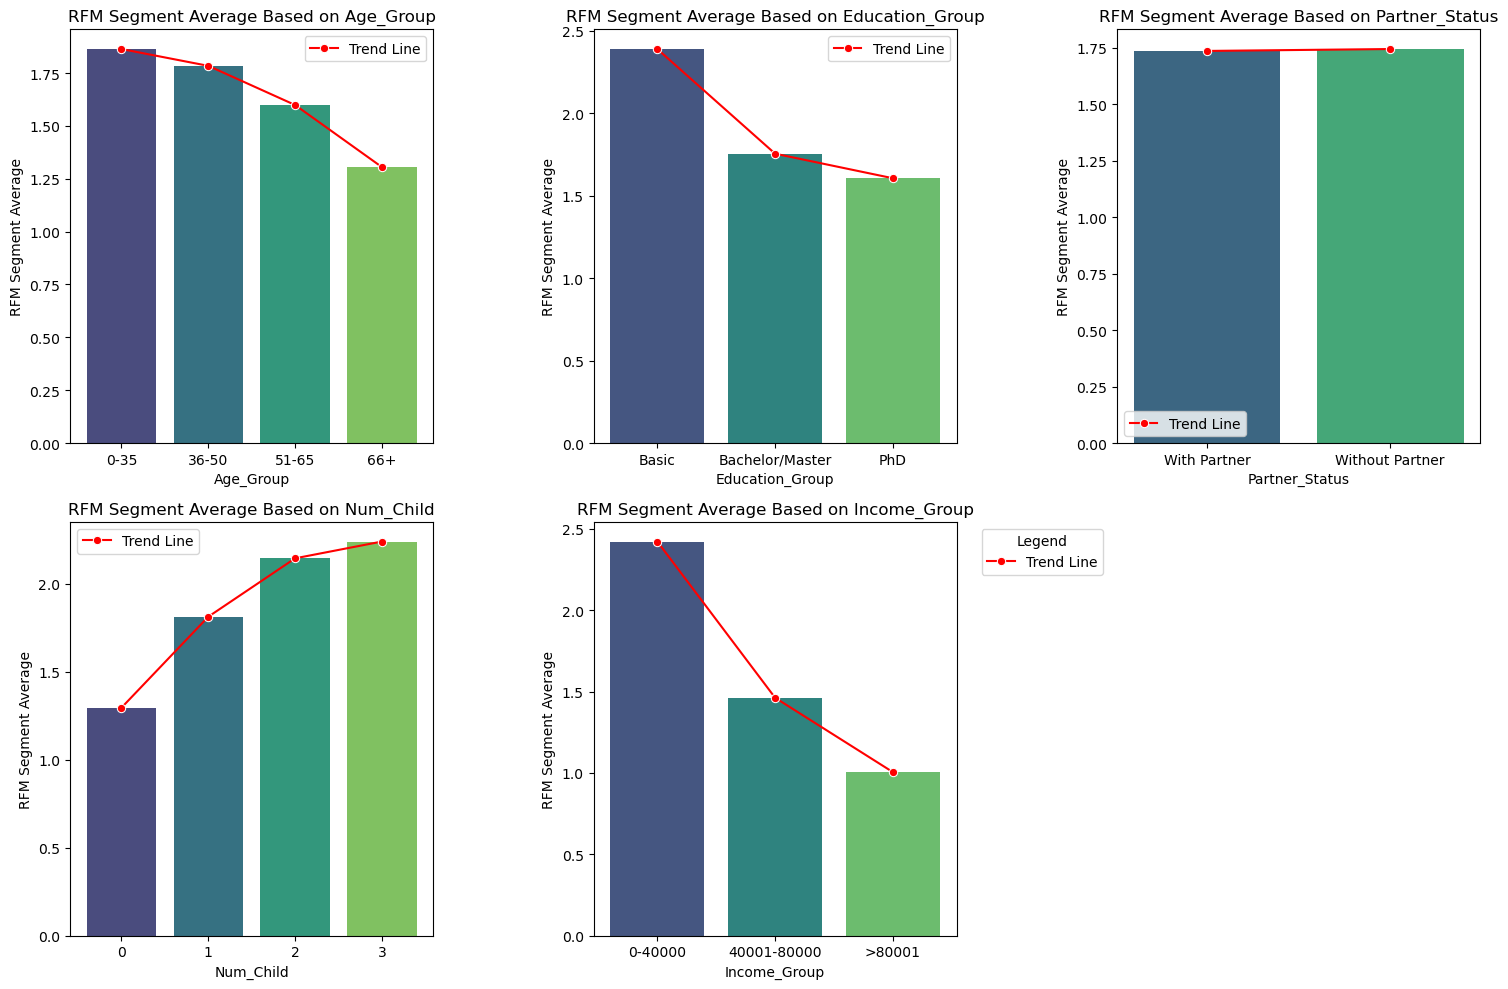

In [46]:
# View the relationship between demographic profile and potential customer segments

# Create age groups/bins
age_bins = [0, 36, 51, 66, float('inf')]
age_labels = ['0-35', '36-50', '51-65', '66+']
df_concat_RFM['Age_Group'] = pd.cut(df_concat_RFM['Age'], bins=age_bins, labels=age_labels, right=False)

# Create income groups/bins
income_bins = [0, 40001, 80001, float('inf')]
income_labels = ['0-40000', '40001-80000', '>80001']
df_concat_RFM['Income_Group'] = pd.cut(df_concat_RFM['Income'], bins=income_bins, labels=income_labels, right=False)

# Combine 'Bachelor' and 'Master' into a single category 'Bachelor/Master'
df_concat_RFM['Education_Group'] = df_concat_RFM['Education'].replace({'Bachelor': 'Bachelor/Master', 'Master': 'Bachelor/Master'})

# Set the category order for the Education column
education_order = ['Basic', 'Bachelor/Master', 'PhD']
df_concat_RFM['Education_Group'] = pd.Categorical(df_concat_RFM['Education_Group'], categories=education_order, ordered=True)

# Categorical columns to display
column_categoric = ['Age_Group', 'Education_Group', 'Partner_Status', 'Num_Child', 'Income_Group']

# Number of bar plots
num_plots = len(column_categoric)

# Overall subplot size
plt.figure(figsize=(15, 10))

for i in range(num_plots):
    column = column_categoric[i]
    # Create a dataframe for the categorical column
    df_bivariate = df_concat_RFM[[column, 'RFM_Segmen']]

    # If the column is a binning column (Income_Group or Age_Group)
    if column in ['Income_Group', 'Age_Group']:
        # View the average RFM segment for the binned groups
        bivariate_segmen = df_bivariate.groupby([column]).mean().sort_index(ascending=True)
        # Get the appropriate column label
        column_label = column
    else:
        # View the average RFM segment for the categorical column
        bivariate_segmen = df_bivariate.groupby([column]).mean().sort_index(ascending=True)
        column_label = column

    # Determine subplot
    plt.subplot(2, 3, i + 1)

    # Plot barplot
    sns.barplot(x=bivariate_segmen.index, y='RFM_Segmen', data=bivariate_segmen.reset_index(), palette='viridis')
    plt.xlabel(column_label)
    plt.ylabel('RFM Segment Average')
    plt.title(f'RFM Segment Average Based on {column_label}')

    # Add trendline except for "Parent_Status" and "Marital_Status"
    if column not in ['Parent_Status', 'Marital_Status']:
        sns.lineplot(x=bivariate_segmen.index, y=bivariate_segmen['RFM_Segmen'], color='red', marker='o', label='Trend Line')

# Add legend for all plots
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**FINDINGS**

Based on the analysis using the bivariate method, the following insights were obtained regarding the relationship between customer segments and demographic profiles:

1. `Age` <br>
The older the customer, the more likely they are to frequently make large transactions and have recently made a purchase. <br><br>

2. `Education Level` <br>
The higher the customer’s education level, the more likely they are to frequently make large transactions and have recently made a purchase. <br><br>

3. `Partner Status` <br>
There is no significant relationship between customer segments for those with a partner and those without a partner. <br><br>

4. `Number of Children` <br>
The more children the customer has, the less likely they are to frequently make large transactions and have recently made a purchase. <br><br>

5. `Income` <br>
The higher the customer's income, the more likely they are to frequently make large transactions and have recently made a purchase. <br><br>

In [47]:
# Save the cleaned data as a CSV file
df_concat_RFM.to_csv('2 Supermarket Customer Cleaned.csv', index=False)

**DEMOGRAPHIC PROFILE OF EACH SEGMEN**

**Based on Age Profile**

In [48]:
## Create age groups/bins
age_bins = [0, 19, 36, 51, 66, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df_concat_RFM['Age_Group'] = pd.cut(df_concat_RFM['Age'], bins=age_bins, labels=age_labels, right=False)

## Create a dataframe for age
df_age = df_concat_RFM[['Year_Birth', 'Age', 'Age_Group', 'RFM_Segmen']]

## View the age group distribution across customer segments
age_group_segmen = df_age.groupby(['RFM_Segmen', 'Age_Group']).size().reset_index(name='Count')

## Change orientation using pivot
age_group_segmen = age_group_segmen.pivot(index='Age_Group', columns='RFM_Segmen', values='Count')

## Create a total column for the number of customers in each age group within each customer segment
age_group_segmen['Total'] = age_group_segmen.sum(axis=1)

## Change the column labels
age_group_segmen = age_group_segmen[['Total', 1, 2, 3]]

## Display the data in percentage form
age_group_segmen = age_group_segmen.div(age_group_segmen.sum(), axis=1) * 100
age_group_segmen.fillna(0).round(2)

RFM_Segmen  Total      1      2      3
Age_Group                             
0-18         0.27   0.36   0.17   0.19
19-35       24.35  20.09  28.55  28.68
36-50       44.16  41.00  48.44  46.08
51-65       28.53  34.27  21.80  23.90
66+          2.68   4.27   1.04   1.15

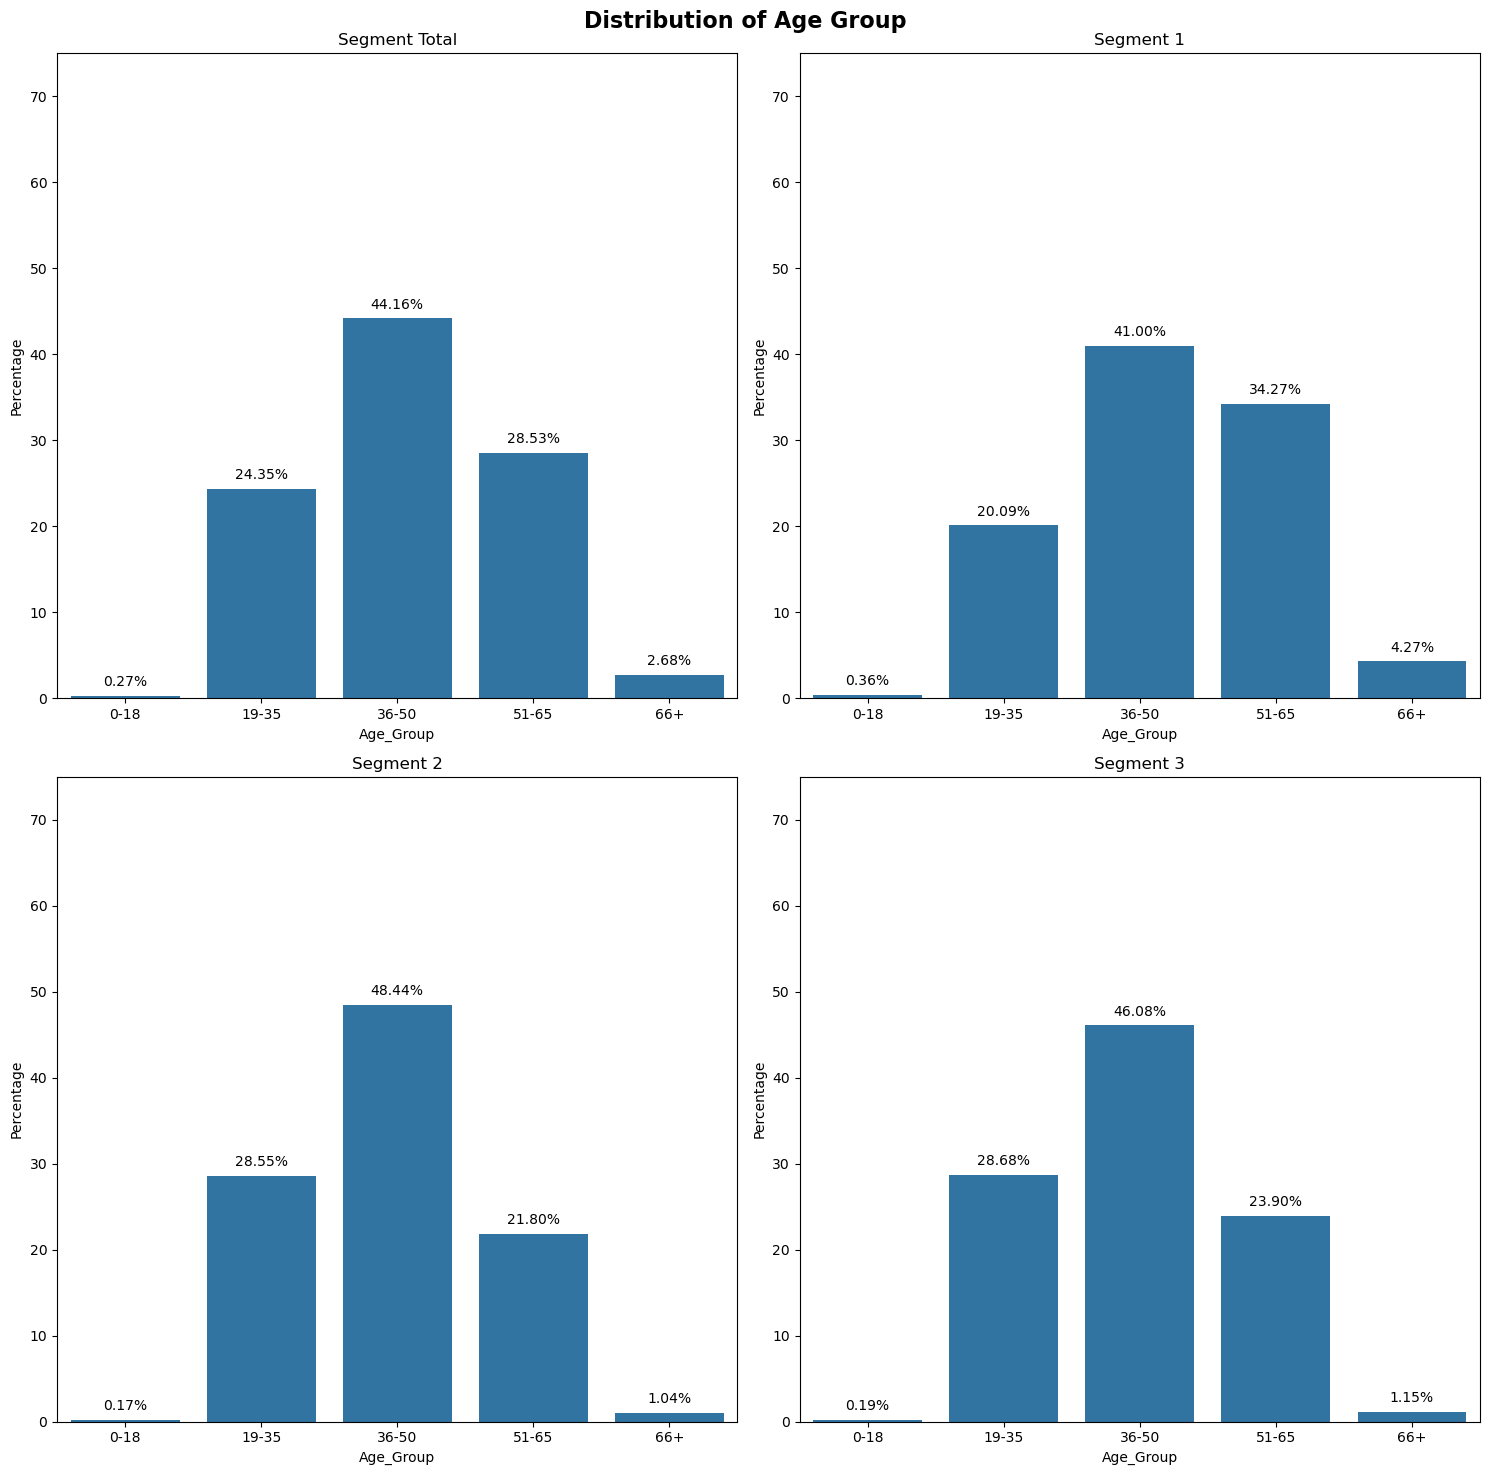

In [49]:
columns = age_group_segmen.columns

# Set the size and layout of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Age Group', fontsize=16, fontweight='bold')

# Create bar plots
for i in range(len(columns)):
    row = i // 2  # Determine the row
    col = i % 2   # Determine the column
    column = columns[i]
    sns.barplot(x=age_group_segmen.index, y=age_group_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=75)  # Set the y-axis limits
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**FINDINGS**

Based on the age groups, the majority of supermarket customers are between 36-50 years old.

`Characteristics of potential customers (Segment 1)`: Customers are older, as evidenced by the higher proportion of customers aged 51-65 compared to Segments 2 and 3.

In [50]:
# Save dataframe into csv
age_csv = age_group_segmen.copy()
age_csv.reset_index(inplace=True)
pd.melt(age_csv, id_vars=['Age_Group'], var_name='Segmen_Age', value_name='Percentage_Age').to_csv('age.csv', index=False)

**Berdasarkan Profil Edukasi**

In [51]:
## Create a dataframe for education
df_education = df_concat_RFM[['Education', 'RFM_Segmen']]

## View the education level distribution across customer segments
education_segmen = df_education.groupby(['RFM_Segmen', 'Education']).size().reset_index(name='Count')

## Change orientation using pivot
education_segmen = education_segmen.pivot(index='Education', columns='RFM_Segmen', values='Count')

## Create a total column for the number of customers in each education level within each customer segment
education_segmen['Total'] = education_segmen.sum(axis=1)

## Change the column labels
education_segmen = education_segmen[['Total', 1, 2, 3]]

## Display the data in percentage form
education_segmen = education_segmen.div(education_segmen.sum(), axis=1) * 100
education_segmen.fillna(0).round(2)

RFM_Segmen  Total      1      2      3
Education                             
Bachelor    50.52  51.27  48.62  51.05
Basic        2.45   0.18   5.02   4.40
Master      25.49  23.73  26.47  28.11
PhD         21.54  24.82  19.90  16.44

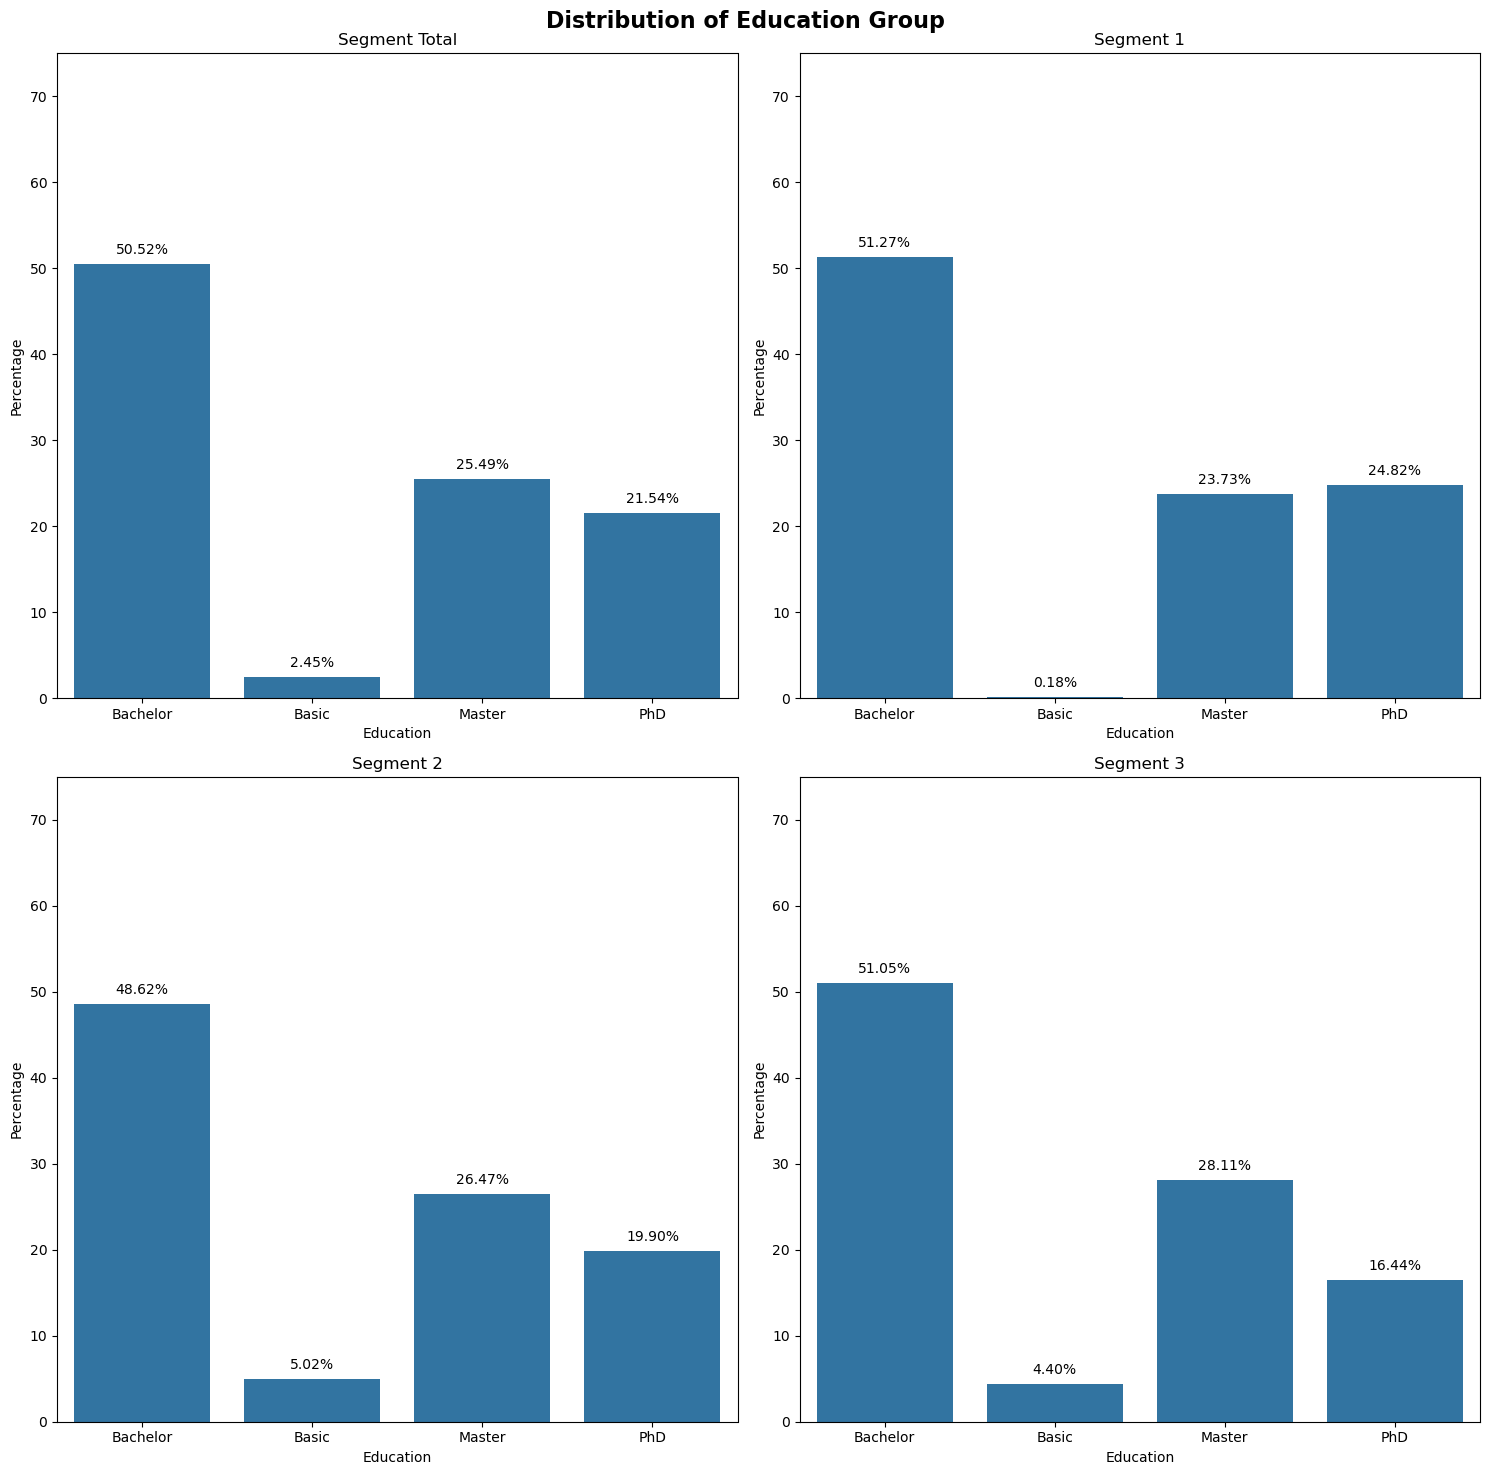

In [52]:
columns = education_segmen.columns

# Combine 'Bachelor' and 'Master' into one category 'Bachelor/Master'
df_concat_RFM['Education'] = df_concat_RFM['Education'].replace({'Bachelor': 'Bachelor/Master', 'Master': 'Bachelor/Master'})

# Set the size and layout of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Education Group', fontsize=16, fontweight='bold')

# Create bar plots
for i in range(len(columns)):
    row = i // 2  # Determine the row
    col = i % 2   # Determine the column
    column = columns[i]
    sns.barplot(x=education_segmen.index, y=education_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=75)  # Set the y-axis limits
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**FINDINGS**

Based on the education level, the majority of supermarket customers have a bachelor's degree.

`Characteristics of Potential Customers (Segment 1)`: Customers in this segment tend to have higher education levels. This is evident from the higher proportion of customers with a *PhD*, which exceeds that of Segment 2 and Segment 3, even surpassing the *Master's* education level by about 1%. There are almost no customers with a *Basic* education level.

In [53]:
# Save dataframe into csv
education_csv = education_segmen.copy()
education_csv.reset_index(inplace=True)
pd.melt(education_csv, id_vars=['Education'], var_name='Segmen_Education', value_name='Percentage_Education').to_csv('education.csv', index=False)

**Based of Number of Child Profile**

In [54]:
## Creating a DataFrame for the Number of Children
df_child = df_concat_RFM[['Num_Child', 'RFM_Segmen']]

## Viewing the number of children by customer segment
child_segmen = df_child.groupby(['RFM_Segmen', 'Num_Child']).size().reset_index(name='Count')

## Pivoting the data
child_segmen = child_segmen.pivot(index='Num_Child', columns='RFM_Segmen', values='Count')

## Creating a column for the total customers in each number of children group per customer segment
child_segmen['Total'] = child_segmen.sum(axis=1)

## Renaming the columns
child_segmen = child_segmen[['Total', 1, 2, 3]]

## Displaying the data as percentages
child_segmen = child_segmen.div(child_segmen.sum(), axis=1)*100
child_segmen.fillna(0).round(2)

RFM_Segmen  Total      1      2      3
Num_Child                             
0           28.44  45.18  12.63  10.71
1           50.43  45.27  55.71  55.45
2           18.86   8.64  28.55  29.64
3            2.27   0.91   3.11   4.21

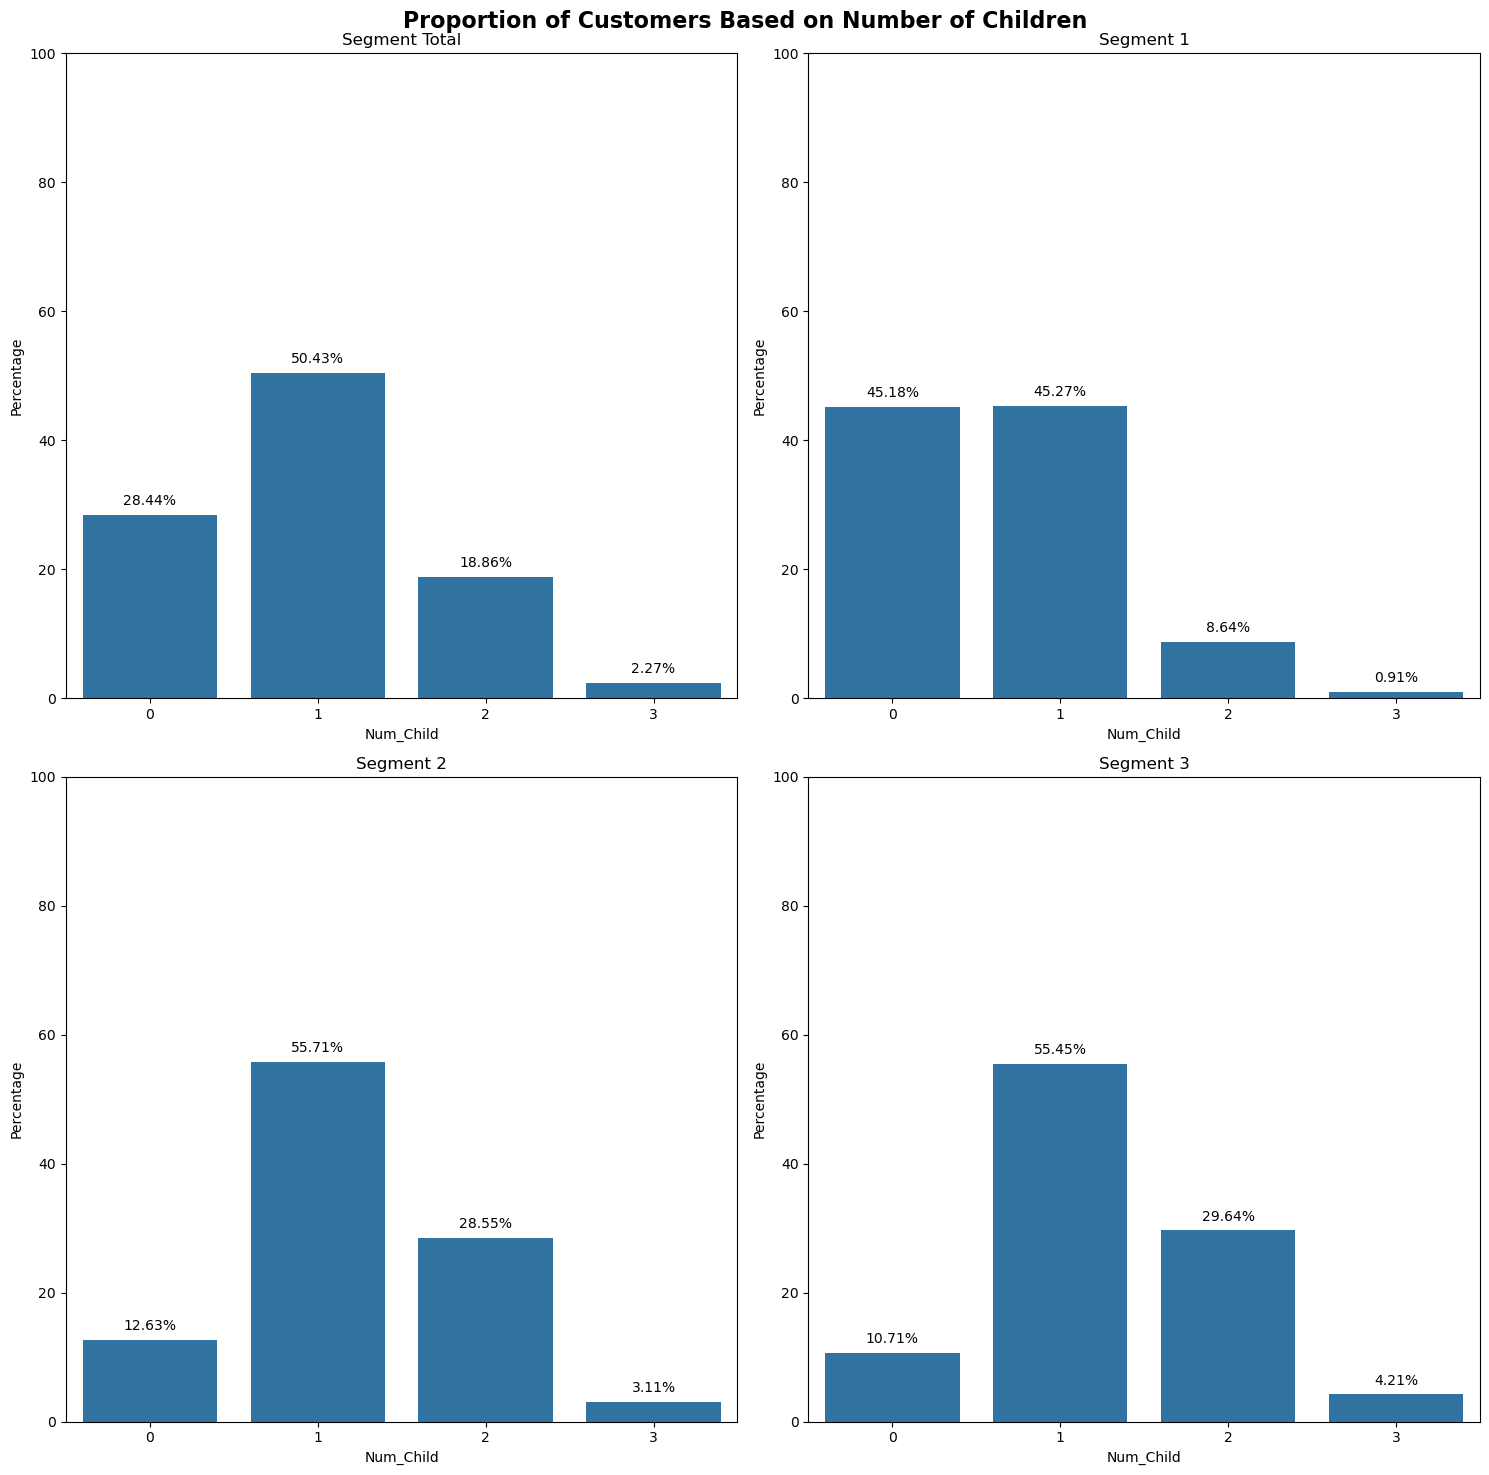

In [55]:
columns = child_segmen.columns

# Set the size and layout of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Proportion of Customers Based on Number of Children', fontsize=16, fontweight='bold')

# Create barplots
for i in range(len(columns)):
    row = i // 2  # Determine row
    col = i % 2   # Determine column
    column = columns[i]
    sns.barplot(x=child_segmen.index, y=child_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=100)  # Set y-axis limits
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**FINDING**

Based on the number of children, most supermarket customers have one child.

`Potential customer characteristics (Segment 1)`: Nearly 50% of customers do not have children, in contrast to segments 2 and 3, where 50% have one child.

In [56]:
# Save dataframe into csv
child_csv = child_segmen.copy()
child_csv.reset_index(inplace=True)
pd.melt(child_csv, id_vars=['Num_Child'], var_name='Segmen_Child', value_name='Percentage_Child').to_csv('child.csv', index=False)

**Based on Income Profile**

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/193#:~:text=World%20Development%20Indicators%20database%3A%20Low,is%20%2412%20745%20or%20more.

In [57]:
# Creating income bins
income_bins = [0, 40001, 80001, float('inf')]
income_labels = ['0-40000', '40001-80000', '>80001']
df_concat_RFM['Income_Group'] = pd.cut(df_concat_RFM['Income'], bins=income_bins, labels=income_labels, right=False)

# Creating a df for income
df_income = df_concat_RFM[['Income_Group', 'RFM_Segmen']]

# Viewing income group segmentation by potential customer segments
income_group_segmen = df_income.groupby(['RFM_Segmen', 'Income_Group']).size().reset_index(name='Count')

# Changing orientation using pivot
income_group_segmen = income_group_segmen.pivot(index='Income_Group', columns='RFM_Segmen', values='Count')

# Creating a total column for each income group in potential customer segments
income_group_segmen['Total'] = income_group_segmen.sum(axis=1)

# Changing the label for each column
income_group_segmen = income_group_segmen[['Total', 1, 2, 3]]

# Displaying data in percentage
income_group_segmen = income_group_segmen.div(income_group_segmen.sum(), axis=1) * 100
income_group_segmen.fillna(0).round(2)

RFM_Segmen    Total      1      2      3
Income_Group                            
0-40000       33.21   2.27  64.36  63.86
40001-80000   57.34  78.91  35.47  36.14
>80001         9.45  18.82   0.17   0.00

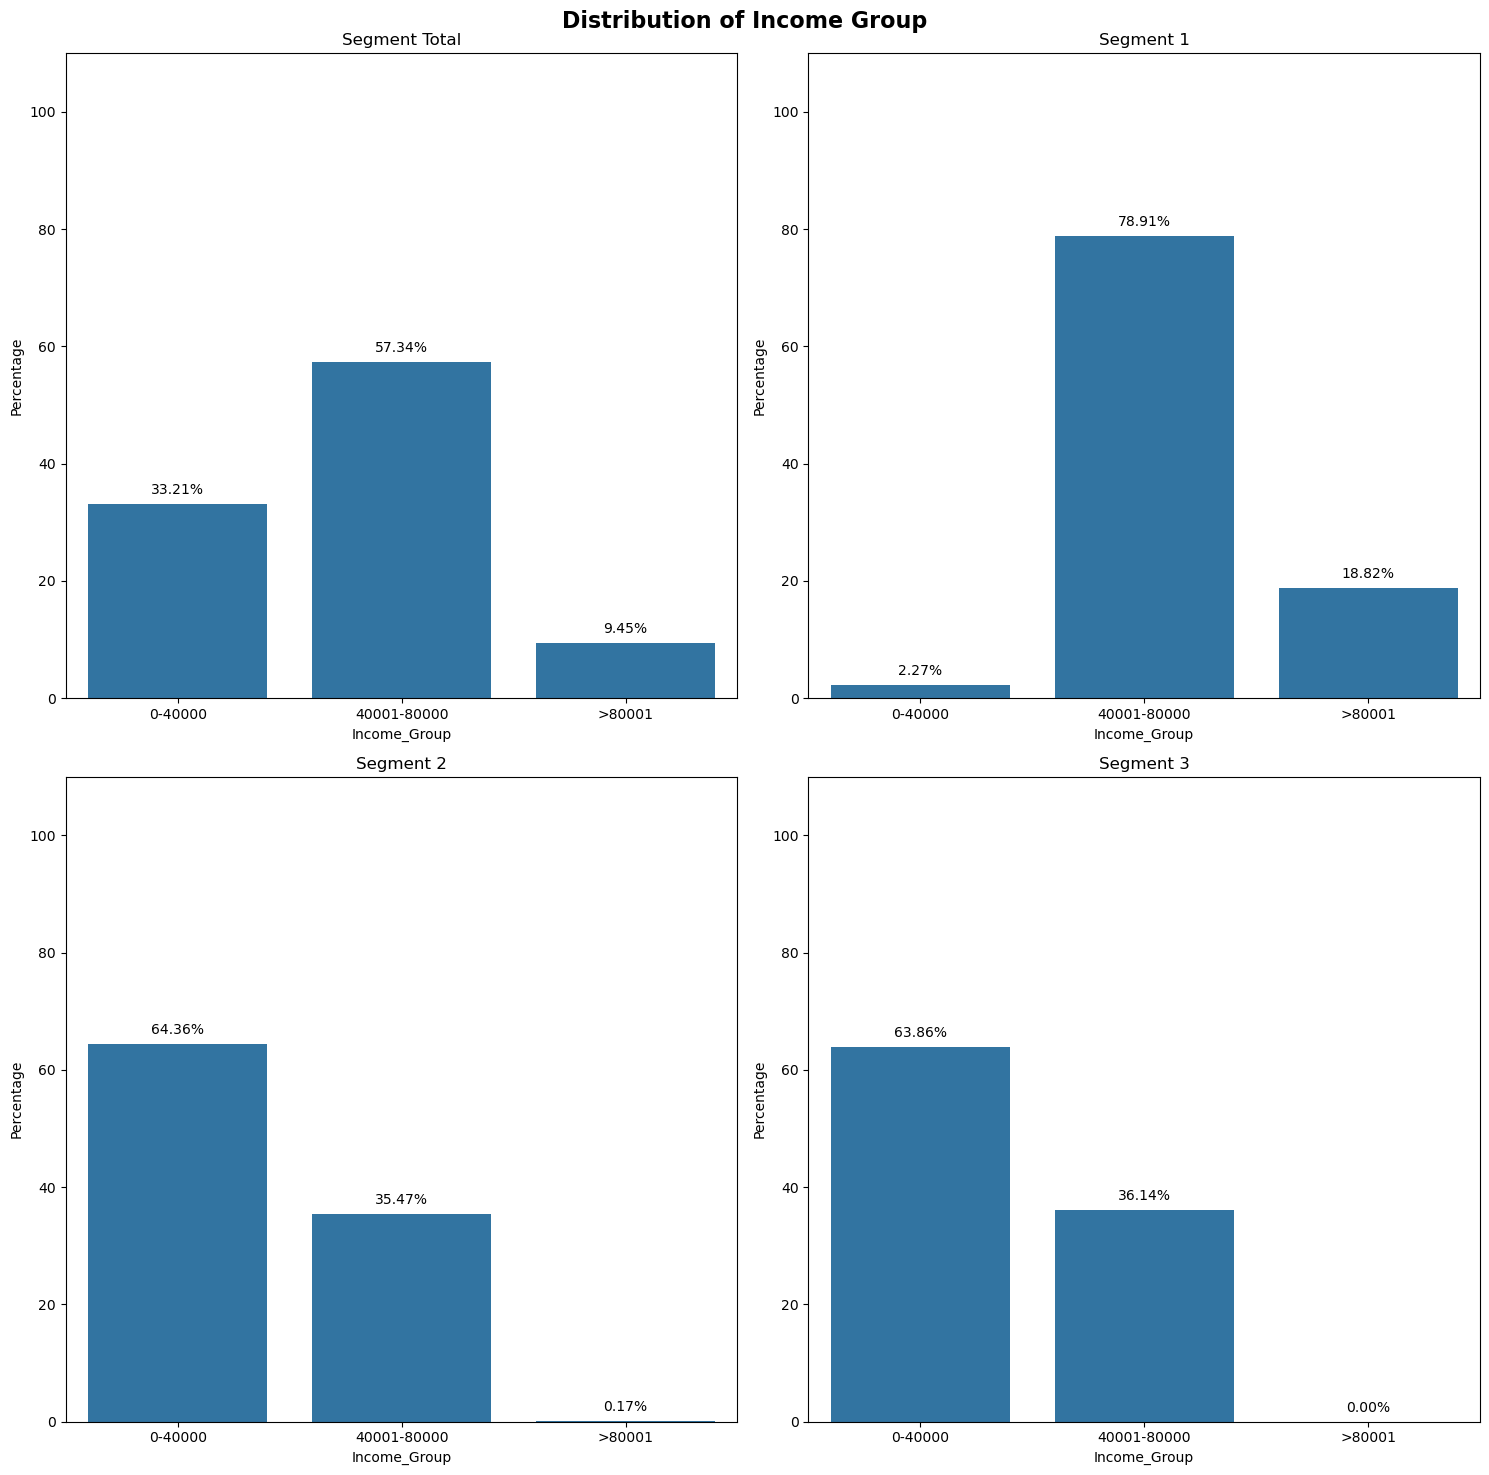

In [58]:
columns = income_group_segmen.columns

# Setting the size and layout of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Income Group', fontsize=16, fontweight='bold')

# Creating barplot
for i in range(len(columns)):
    row = i // 2  # Determine the row
    col = i % 2   # Determine the column
    column = columns[i]
    sns.barplot(x=income_group_segmen.index, y=income_group_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=110)  # Set y-axis limits
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**FINDINGS**

Based on the income, most customers earn between 40,000 and 80,000 ($) annually.

`Characteristics of Potential Customers (Segment 1)`: Customers in this segment tend to have higher income, with only a small percentage (2.27%) earning between 0 and 40,000 dollars per year. The proportion of customers earning above 80,000 dollars annually is significantly higher compared to Segments 2 and 3.


In [59]:
# Save dataframe into csv
income_csv = income_group_segmen.copy()
income_csv.reset_index(inplace=True)
pd.melt(income_csv, id_vars=['Income_Group'], var_name='Segmen_Income', value_name='Percentage_Income').to_csv('income.csv', index=False)

## 3.2 PRODUCT ANALYSIS

`2. How can the supermarket optimize sales within the potential customer segment?` <br>

What are the appropriate campaign strategies for the potential customer segment?

**PRODUCT PREFERENCE**

To determine the products suitable for offering to potential customer segments, an analysis can be conducted on the Amount Spent by customers when purchasing products in the supermarket.

In [60]:
# Create a dataframe for the amount spent on each product
df_amount = df_concat_RFM[['MntWines','MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds','RFM_Segmen']]

# Create a table summarizing the amount spent on each product by each customer segment
amount_segmen = df_amount.groupby('RFM_Segmen').sum()
amount_segmen.loc['Total'] = amount_segmen.sum()
amount_segmen

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
RFM_Segmen                                                          
1             617083      52027           335334            74194   
2              31808       3190            14884             4903   
3              24847       2827            13570             3737   
Total         673738      58044           363788            82834   

            MntSweetProducts  MntGoldProds  
RFM_Segmen                                  
1                      53518         78727  
2                       3296          9713  
3                       2937          8214  
Total                  59751         96654

In [61]:
# Transpose the orientation of the data
amount_segmen = amount_segmen.T
amount_segmen['Total'] = amount_segmen.sum(axis=1)
amount_segmen = amount_segmen [['Total',1,2,3]]

# Display the data as percentages
amount_segmen = amount_segmen.sort_values(by='Total', ascending=False)
amount_segmen = amount_segmen.div(amount_segmen.sum(), axis = 1) * 100
amount_segmen.fillna(0).round(2)

RFM_Segmen        Total      1      2      3
MntWines          50.47  50.96  46.92  44.27
MntMeatProducts   27.25  27.69  21.95  24.18
MntGoldProds       7.24   6.50  14.33  14.63
MntFishProducts    6.21   6.13   7.23   6.66
MntSweetProducts   4.48   4.42   4.86   5.23
MntFruits          4.35   4.30   4.71   5.04

In [62]:
# Save the dataset into csv
amount_csv = amount_segmen.copy()
amount_csv.reset_index(inplace=True)
pd.melt(amount_csv, id_vars=['index'], var_name='Segmen_Amount', value_name='Percentage_Amount').to_csv('amount.csv', index=False)

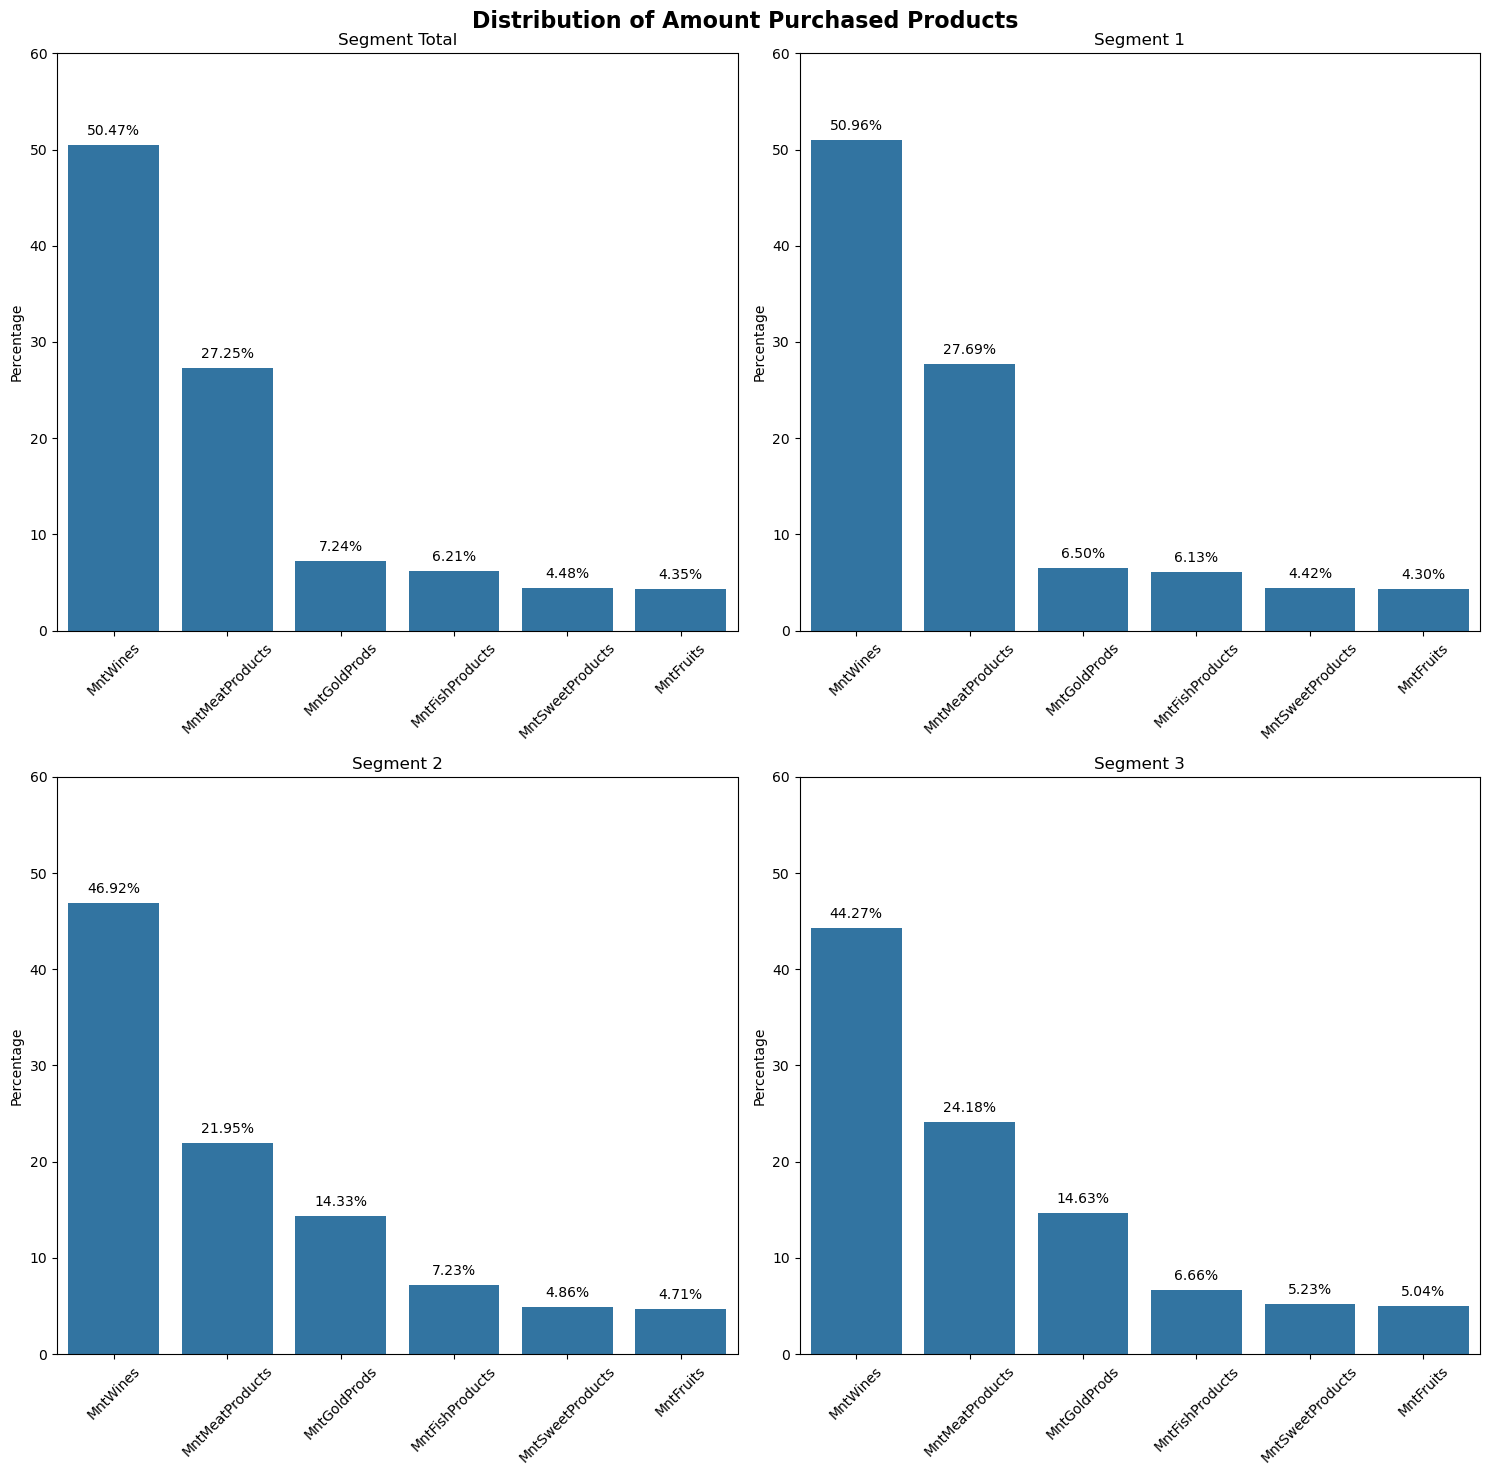

In [63]:
columns = amount_segmen.columns

# Set the size and layout of the subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Amount Purchased Products', fontsize=16, fontweight='bold')

# Create a bar plot
for i in range(len(columns)):
    row = i // 2  # Determine the row
    col = i % 2   # Determine the column
    column = columns[i]
    sns.barplot(x=amount_segmen.index, y=amount_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=60)  # Set y-axis limits
    axes[row, col].set_xlabel('')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**FINDINGS**  

Based on the *Amount Spent* by customers on products, overall, customers tend to allocate a large portion of their *Amount Spent* to wine products.  

`Characteristics of potential customers (Segment 1)`: Customers show a higher interest in wine and meat products and a lower interest in gold compared to customers in Segments 2 and 3.  

## 3.3 PROMOTION ANALYSIS

`2. How can the supermarket optimize sales within the potential customer segment?`<br>
     2.2 What products are suitable to offer to the potential customer segment?<br>

**CAMPAIGN PREFERENCE**  

To determine a suitable campaign for serving potential customer segments, a data analysis was conducted by comparing the campaign preferences received by customers over the past two years.  

In [64]:
# Creating a dataframe variable for campaigns
df_campaign = df_concat_RFM[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'RFM_Segmen']]

# Viewing the success count of each campaign for every customer segment
campaign_segmen = df_campaign.groupby('RFM_Segmen').sum()
campaign_segmen.loc['Total'] = campaign_segmen.sum()
campaign_segmen

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
RFM_Segmen                                                           
1                    138            28            89           145   
2                      3             2            46             9   
3                      0             0            28            10   
Total                141            30           163           164   

            AcceptedCmp5  AcceptedCmp6  
RFM_Segmen                              
1                    160           231  
2                      0            80  
3                      0            20  
Total                160           331

In [65]:
# Creating a table to show the conversion rate of each campaign for every customer segment

# Transpose campaign_segmen to ensure correct orientation
campaign_segmen = campaign_segmen.T

# Calculate the conversion rate
conversion_rate = (campaign_segmen / df_segment_counts.iloc[0]) * 100

# Select relevant columns and round values
conversion_rate = conversion_rate[['Total', 1, 2, 3]].round(2)

# Reset index to ensure a sequential index
conversion_rate = conversion_rate.reset_index()

conversion_rate

RFM_Segmen         index  Total      1      2     3
0           AcceptedCmp1   6.41  12.55   0.52  0.00
1           AcceptedCmp2   1.36   2.55   0.35  0.00
2           AcceptedCmp3   7.41   8.09   7.96  5.35
3           AcceptedCmp4   7.45  13.18   1.56  1.91
4           AcceptedCmp5   7.27  14.55   0.00  0.00
5           AcceptedCmp6  15.04  21.00  13.84  3.82

In [66]:
# Saving the data from amount_segmen into a CSV file
campaign_csv = conversion_rate.copy()
campaign_csv.reset_index(inplace=True)
pd.melt(campaign_csv, id_vars=['index'], var_name='Segmen_Campaign', value_name='Percentage_Campaign').to_csv('campaign.csv', index=False)

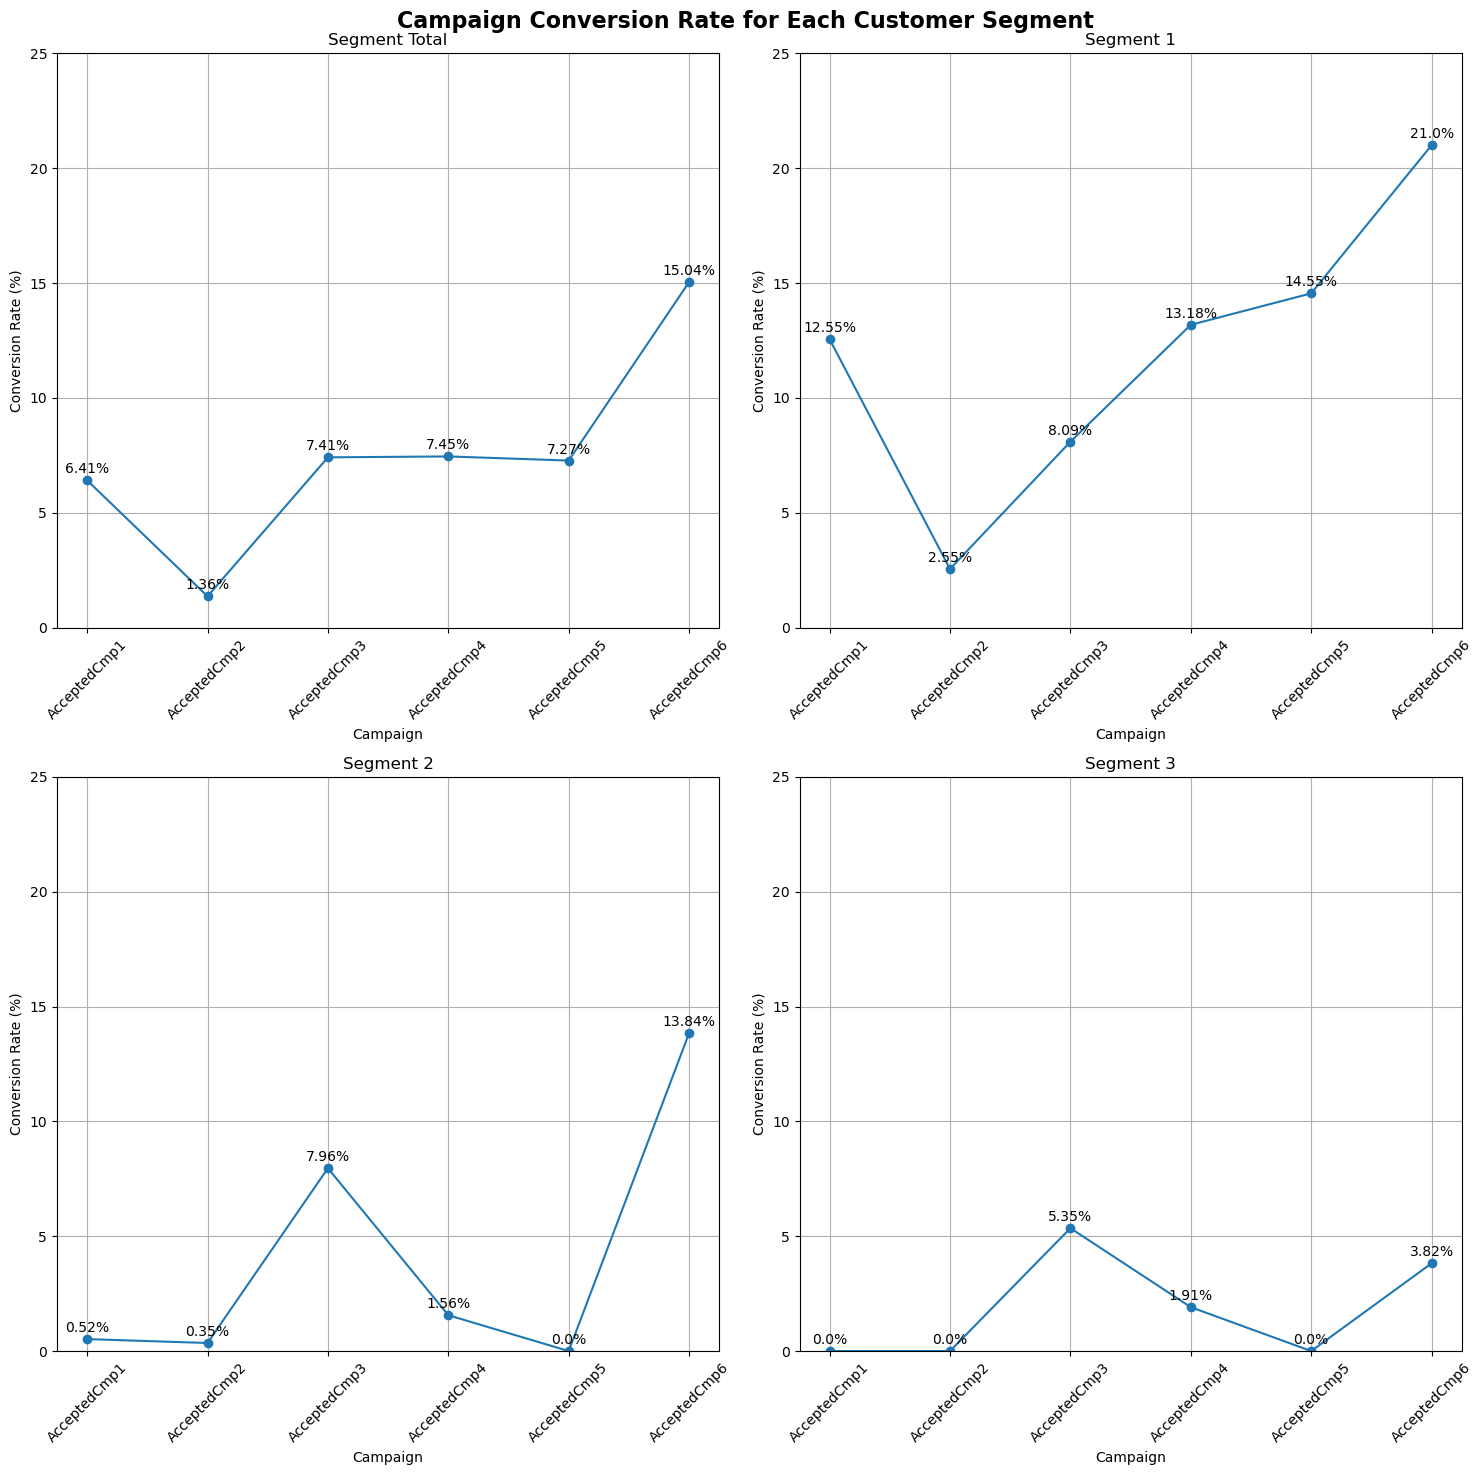

In [67]:
# Setting the size and layout of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Campaign Conversion Rate for Each Customer Segment', fontsize=16, fontweight='bold')

# Creating line plots for each segment
column_names = conversion_rate.columns[1:]
for i in range(len(column_names)): 
    ax = axes.flatten()[i]
    column_name = column_names[i]
    ax.plot(conversion_rate['index'], conversion_rate[column_name], marker='o', linestyle='-')  
    ax.set_title(f'Segment {column_name}')
    
    ax.set_xlabel('Campaign')
    ax.set_ylabel('Conversion Rate (%)')
    ax.set_ylim(0, 25)
    ax.grid(True)
    ax.set_xticklabels(conversion_rate['index'], rotation=45)  # Rotate x-axis labels 45 degrees
    
    # Adding annotations
    for j in range(len(conversion_rate)):
        rate = conversion_rate.iloc[j][column_name]
        ax.annotate(f'{rate}%', (conversion_rate.index[j], rate), textcoords="offset points", xytext=(0,5), ha='center')

# Adjust subplot layout
plt.tight_layout()
plt.show()

**FINDINGS**  

Based on previous campaigns, the most recent campaign (6) was generally considered successful in delivering positive results. Meanwhile, campaign 2 was deemed unsuccessful due to its lack of appeal to many customers.  

`Characteristics of potential customers (Segment 1)`: Customers responded positively to the campaigns, as indicated by the highest percentage of acceptance for each campaign compared to Segments 2 and 3.  

**CORRELATION BETWEEN CAMPAIGN AND PRODUCT**  

To determine the most effective campaign and the suitable products to offer to potential customer segments, a correlation test was conducted using the *Spearman* method. This test identifies the strongest correlation between campaigns and the *amount spent* on each product.  

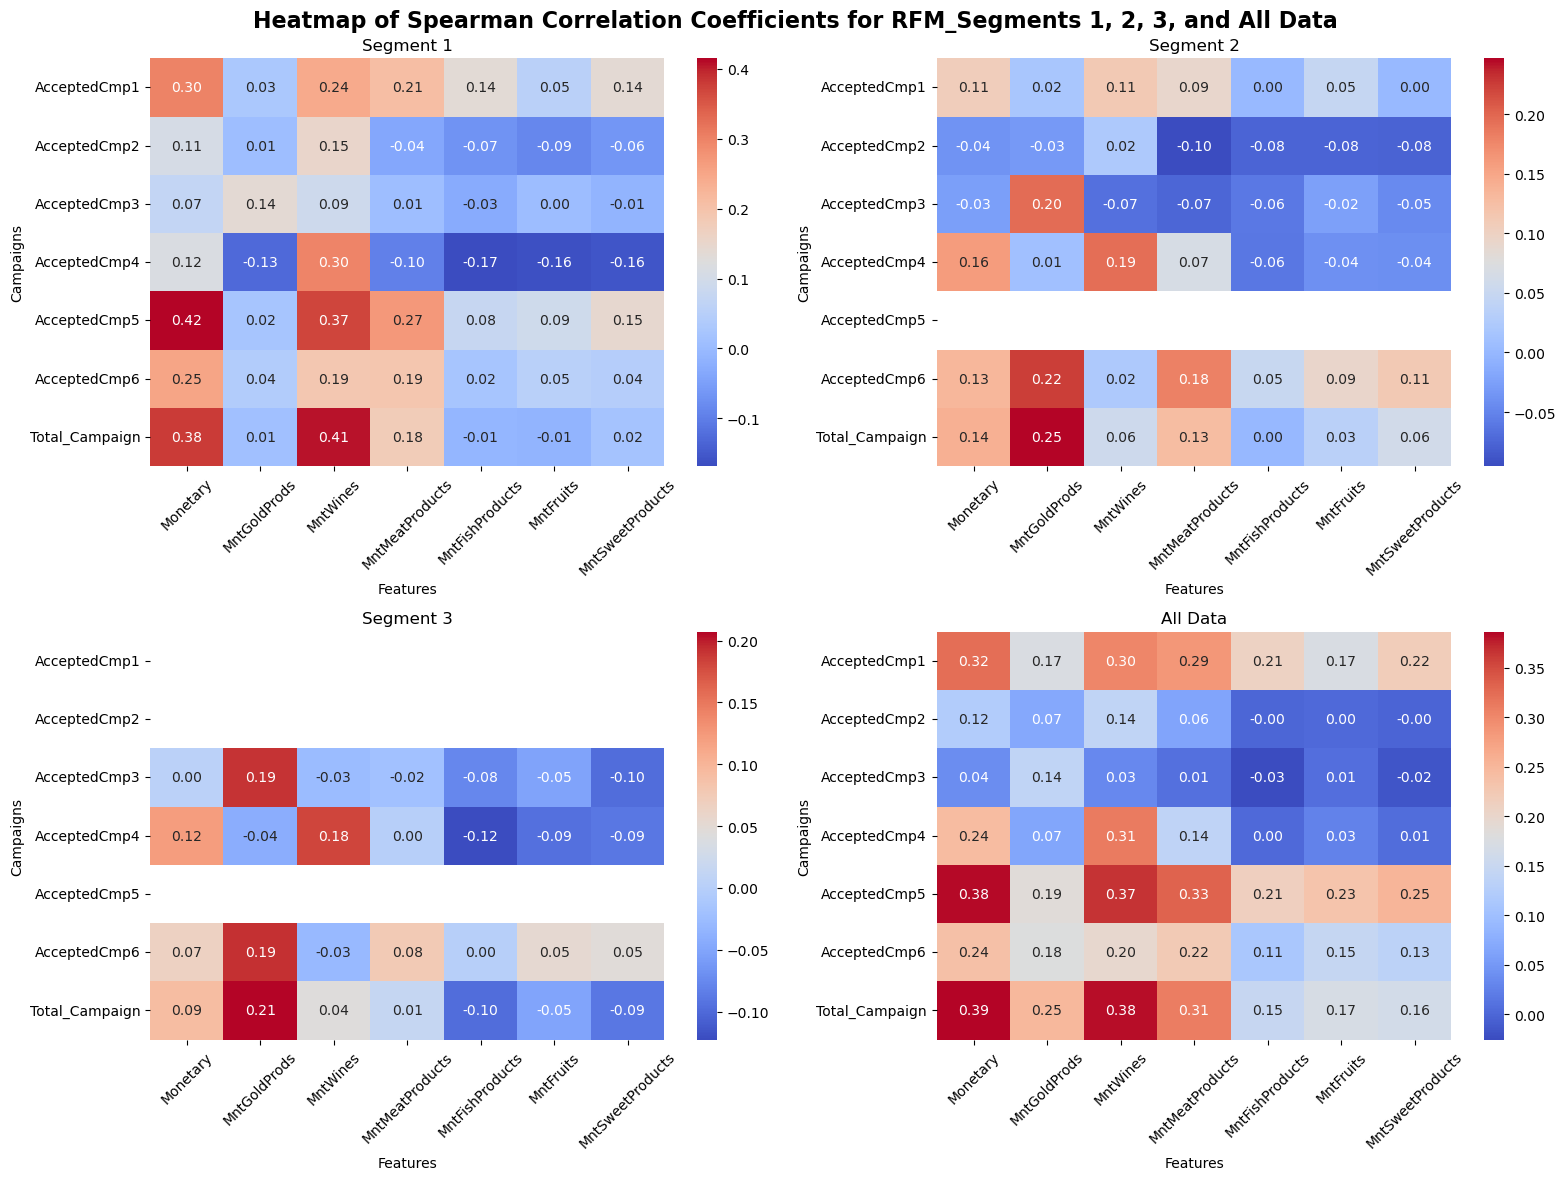

In [68]:
# Analyze the relationship between campaigns and products

columns_to_correlate = [
    'Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
    'MntFishProducts', 'MntFruits', 'MntSweetProducts', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'
]

# Filter DataFrame for RFM_Segments 1, 2, and 3
df_segment_1 = df_concat_RFM[df_concat_RFM['RFM_Segmen'] == 1]
df_segment_2 = df_concat_RFM[df_concat_RFM['RFM_Segmen'] == 2]
df_segment_3 = df_concat_RFM[df_concat_RFM['RFM_Segmen'] == 3]

# Create new DataFrames containing only selected columns for each RFM segment
df_selected_1 = df_segment_1[columns_to_correlate]
df_selected_2 = df_segment_2[columns_to_correlate]
df_selected_3 = df_segment_3[columns_to_correlate]

# Compute Spearman correlation matrices for each RFM segment
correlation_matrix_1 = df_selected_1.corr(method='spearman')
correlation_matrix_2 = df_selected_2.corr(method='spearman')
correlation_matrix_3 = df_selected_3.corr(method='spearman')

# Create a new DataFrame containing selected columns without filtering by RFM segment
df_selected_all = df[columns_to_correlate]

# Compute Spearman correlation matrix for all data
correlation_matrix_all = df_selected_all.corr(method='spearman')

# Set up subplot layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Heatmap of Spearman Correlation Coefficients for RFM_Segments 1, 2, 3, and All Data', fontsize=16, fontweight='bold')

# Generate heatmap for RFM Segment 1
sns.heatmap(correlation_matrix_1.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                       'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                      ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                       'MntFishProducts', 'MntFruits', 'MntSweetProducts']],
            annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Segment 1')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Campaigns')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)  # Rotate x-axis labels 45 degrees

# Generate heatmap for RFM Segment 2
sns.heatmap(correlation_matrix_2.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                       'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                      ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                       'MntFishProducts', 'MntFruits', 'MntSweetProducts']],
            annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Segment 2')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Campaigns')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Generate heatmap for RFM Segment 3
sns.heatmap(correlation_matrix_3.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                       'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                      ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                       'MntFishProducts', 'MntFruits', 'MntSweetProducts']],
            annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Segment 3')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Campaigns')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Generate heatmap for all data without RFM segmentation
sns.heatmap(correlation_matrix_all.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                         'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                        ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                         'MntFishProducts', 'MntFruits', 'MntSweetProducts']],
            annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('All Data')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Campaigns')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


**FINDINGS**

Based on the correlation test results between campaigns and the *amount spent* on each product, overall, campaign 5 has a significant impact on the *amount spent* on *wine* and *meat* and is the largest contributor to *monetary* compared to other campaigns.

`Characteristics of potential customers (Segment 1)`: Potential customers tend to accept campaign 5, which focuses on *wine* and *meat* products, compared to other segments that reject campaign 5 and are more focused on *gold* products.

In [69]:
# Create a CSV file for generating heatmap 1 in Tableau
df_heatmap_1 = correlation_matrix_1.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                         'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                        ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                         'MntFishProducts', 'MntFruits', 'MntSweetProducts']]

df_heatmap_1.reset_index(inplace=True)
pd.melt(df_heatmap_1, id_vars=['index'], var_name='Amount_1', value_name='Percentage_Correlation_1').to_csv('heatmap 1.csv', index=False)

# Create a CSV file for generating heatmap 2 in Tableau
df_heatmap_2 = correlation_matrix_2.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                         'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                        ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                         'MntFishProducts', 'MntFruits', 'MntSweetProducts']]
df_heatmap_2.reset_index(inplace=True)
pd.melt(df_heatmap_2, id_vars=['index'], var_name='Amount_2', value_name='Percentage_Correlation_2').to_csv('heatmap 2.csv', index=False)

# Create a CSV file for generating heatmap 3 in Tableau
df_heatmap_3 = correlation_matrix_3.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                         'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                        ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                         'MntFishProducts', 'MntFruits', 'MntSweetProducts']]

df_heatmap_3.reset_index(inplace=True)
pd.melt(df_heatmap_3, id_vars=['index'], var_name='Amount_3', value_name='Percentage_Correlation_3').to_csv('heatmap 3.csv', index=False)

# Create a CSV file for generating the overall heatmap in Tableau
df_heatmap_all = correlation_matrix_all.loc[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                             'AcceptedCmp5', 'AcceptedCmp6', 'Total_Campaign'],
                                            ['Monetary', 'MntGoldProds', 'MntWines', 'MntMeatProducts',
                                             'MntFishProducts', 'MntFruits', 'MntSweetProducts']]

df_heatmap_all.reset_index(inplace=True)
pd.melt(df_heatmap_all, id_vars=['index'], var_name='Amount_All', value_name='Percentage_Correlation_All').to_csv('heatmap all.csv', index=False)


## 3.4  DISTRIBUTION CHANNEL ANALYSIS

`2. How can the supermarket optimize sales within the potential customer segment?`   
2.3 What distribution channels are best suited to serve the potential customer segment?

**DISTRIBUTION CHANNEL PREFERENCE**

To determine the appropriate distribution channel for serving the potential customer segment, data analysis was conducted by comparing the distribution of customers across each channel.

In [70]:
# Creating a dataframe variable for *distribution channel*
df_distribution = df_concat_RFM[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'RFM_Segmen']]

## Creating a table showing the number of purchases in each *distribution channel* for each customer segment
distribution_segmen = df_distribution.groupby('RFM_Segmen').sum()
distribution_segmen.loc['Total'] = distribution_segmen.sum()
distribution_segmen

NumWebPurchases  NumStorePurchases  NumCatalogPurchases
RFM_Segmen                                                         
1                      6453               9094                 5146
2                      1402               1980                  348
3                      1166               1742                  322
Total                  9021              12816                 5816

In [71]:
# Transposing the table display
distribution_segmen = distribution_segmen.T
distribution_segmen['Total'] = distribution_segmen.sum(axis=1)
distribution_segmen['Total'] = distribution_segmen.sum(axis=1)
distribution_segmen = distribution_segmen[['Total', 1, 2, 3]]

# Displaying data in percentage format
distribution_segmen = distribution_segmen.sort_values(by='Total', ascending=False)
distribution_segmen = distribution_segmen.div(distribution_segmen.sum(), axis=1) * 100
distribution_segmen.fillna(0).round(2)

RFM_Segmen           Total      1      2      3
NumStorePurchases    46.35  43.95  53.08  53.93
NumWebPurchases      32.62  31.18  37.59  36.10
NumCatalogPurchases  21.03  24.87   9.33   9.97

In [72]:
# Saving the dataframe as a CSV
distribution_csv = distribution_segmen.copy()
distribution_csv.reset_index(inplace=True)
pd.melt(distribution_csv, id_vars=['index'], var_name='Segmen_Distribution', value_name='Percentage_Distribution').to_csv('distribution.csv', index=False)

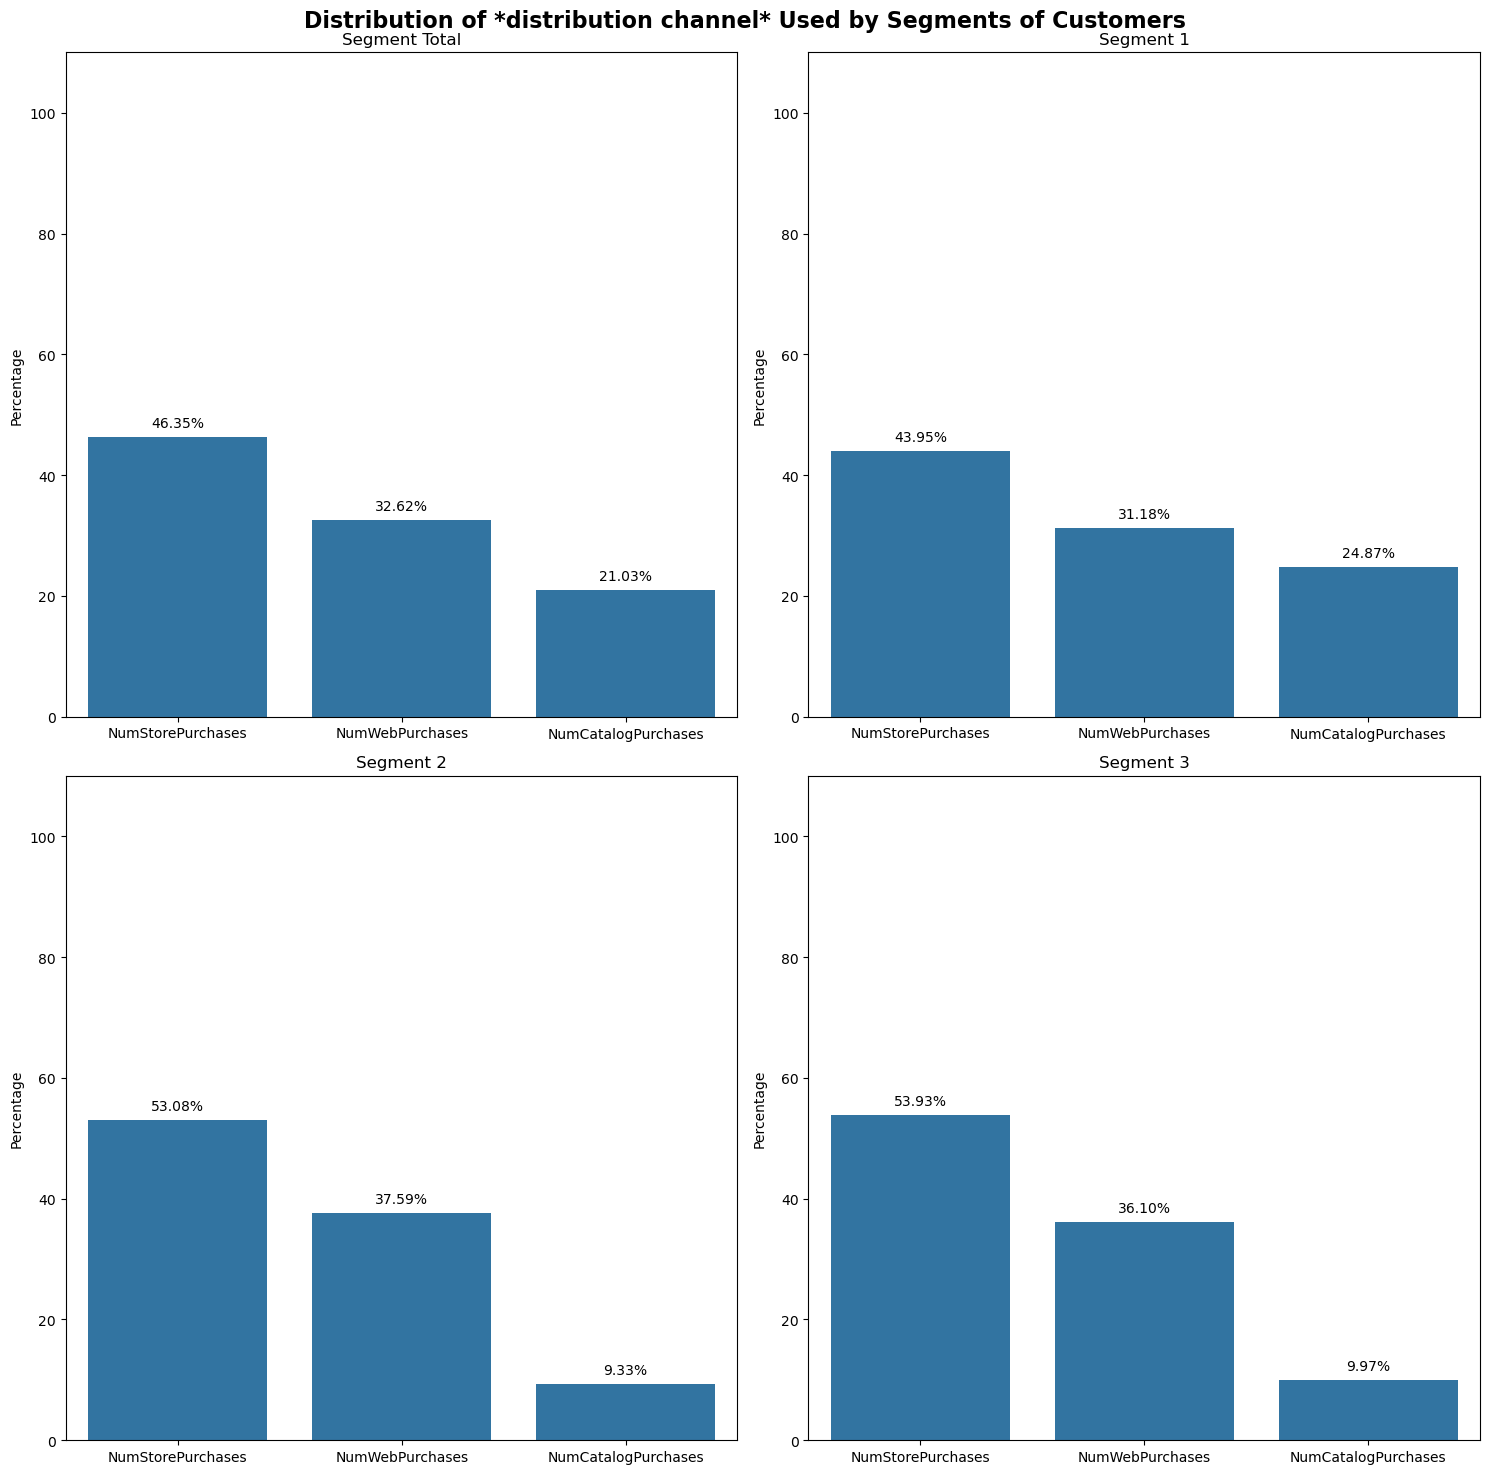

In [73]:
columns = distribution_segmen.columns

# Set the size and layout of the subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of *distribution channel* Used by Segments of Customers', fontsize=16, fontweight='bold')

# Create bar plots
for i in range(len(columns)):
    row = i // 2  # Determine the row
    col = i % 2   # Determine the column
    column = columns[i]
    sns.barplot(x=distribution_segmen.index, y=distribution_segmen[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segment {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=110)  # Set y-axis limits
    axes[row, col].set_xlabel('')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels())
    
    # Annotate the bars with the values
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Adjust the layout of the subplot
plt.tight_layout()
plt.show()

**FINDINGS**

Based on the analysis of the *channel of distribution*, overall, the most preferred channel by customers in each segment is the *store*.

`Characteristics of potential customers (Segment 1)`: Potential customers show a higher preference for the *catalog* channel compared to segments 2 and 3.

# 4. CONCLUSION AND RECOMMENDATION

## CHARACTERISTICS OF POTENTIAL CUSTOMERS

**SUPERMARKET CUSTOMER SEGMENTATION TO IDENTIFY POTENTIAL CUSTOMERS FOR SALES INCREASE TARGETING**

There are three customer segments in the supermarket based on the analysis using the RFM method:

1. `Segment 1`  
   Consists of customers with high *monetary* values, indicating a tendency to make transactions with large amounts.  

2. `Segment 2`  
   Consists of customers with high *frequency* and/or *recency* values, meaning these customers frequently make transactions and/or have recently made a purchase.  

3. `Segment 3`  
   Consists of customers with low *recency*, *frequency*, and *monetary* values, showing that they rarely make transactions, haven't purchased in a while, and their transaction amounts are small.  

Therefore, it can be concluded that `Segment 1 is the potential customer segment` to target for increasing sales. By prioritizing customers who tend to spend more, supermarkets can also boost revenue with larger transaction amounts.

**PROFILE OF POTENTIAL CUSTOMERS TO TARGET FOR INCREASING SALES**

There are 4 key demographic profiles that should be highlighted when looking at the potential customer segment: age, education level, number of children, and income level. These demographic profiles show significant trends or tendencies that define the potential customer segment, making it clearly distinguishable from other customer segments. Based on the analysis of customer demographics, the following conclusions can be drawn:

| Demographic Profile       |           Segment 1                                                                                                  |           Segment 2                                                                                          |           Segment 3                                                                                       |
|:-------------------------:|:---------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------:|
| Age Group                 | Older age (High proportion of customers aged 50-65)                                                                  | Younger age (Low proportion of customers aged 50-65)                                                          | Younger age (Low proportion of customers aged 50-65)                                                      |
| Education Level           | Significant proportion with a PhD, and almost none with basic education                                              | Low proportion with a PhD, and a small portion with basic education                                          | Low proportion with a PhD, and a small portion with basic education                                       |
| Number of Children        | 50% of customers have no children                                                                                     | 50% of customers have one child                                                                                | 50% of customers have one child                                                                            |
| Income                    | Predominantly middle class, with a significant portion in the upper-middle class                                     | Predominantly lower middle class, with almost no customers in the upper-middle class                          | Predominantly lower middle class, with no customers in the upper-middle class                            |

Based on the demographic profiles, Segment 1 customers have the characteristics that support them as the "potential" customer segment to target for increasing sales. Customers in this segment are generally older, have higher education levels, are without children, and the majority fall within the middle to upper-middle-income class. Additionally, these four profiles are interconnected: older customers tend to have higher education, which results in higher income, and fewer children provide more freedom to make larger purchases. By prioritizing sales to this customer segment, the supermarket can more effectively increase its revenue.

## INCREASING SALES FOR POTENTIAL CUSTOMER SEGMENT

**THE RIGHT PRODUCTS TO OFFER TO THE POTENTIAL CUSTOMER SEGMENT**

Potential customers show a high *Amount Spent* percentage on *wine* products. Therefore, `the right product to offer to the potential customer segment is *wine*`. By focusing sales on *wine*, supermarkets can effectively increase their revenue. Several steps can be taken to maximize *wine* sales, including:

1. **Expanding and increasing the variety of wine products**  
   By doing so, the supermarket can enhance its reputation as a store with a complete product range. This is beneficial for attracting wine enthusiasts, as they won't have difficulty finding the desired variety of wine.

2. **Running special promotions for wine products**  
   This could include offering special discounts during certain events, providing shopping vouchers, and creating bundling packages that combine wine with other relevant products.

**THE RIGHT CAMPAIGN STRATEGY FOR THE POTENTIAL CUSTOMER SEGMENT**

Overall, the potential customer segment shows a consistent and positive response rate to the 6 campaigns conducted over the last two years, indicating that the implemented strategies have been effective in `attracting customers`. Specifically, *campaign* 6 had the highest *Accepted Campaign* rate, while *campaign* 2 had the lowest *Accepted Campaign* rate.

Additionally, *campaign 5* is the most effective in terms of `increasing supermarket revenue` through the potential customer segment, as seen from its significant correlation with *monetary*. This campaign is highly suitable and personalized for the potential customer segment, as it was only accepted by this group. Products with significant correlation to campaign 5 include *wine* and *meat*.

Based on this information, here are some effective strategies to increase supermarket revenue through the potential customer segment:

1. **Implement and Combine Campaign 5 and 6 Strategies**  
   The right approach is to strengthen and expand the aspects that were successful in these campaigns. Identify what made Campaigns 5 and 6 successful, and expand or improve those elements to reach more potential customers.

2. **Optimize and Evaluate Campaign 2**  
   The strategy should involve in-depth analysis to understand why this campaign was less effective and make the necessary changes to improve its performance. This could involve modifying the messaging or other adjustments to enhance response from the potential customer segment.

3. **Personalize Campaigns for Wine and Meat Products**  
   Actions can include adding more variety or bundling packages to attract purchases of *wine* and *meat*, offering exclusive discounts or loyalty programs for purchasing wine and meat, providing personal shopper services, or exclusive product consultations.

**SUITABLE DISTRIBUTION CHANNELS TO SERVE THE POTENTIAL CUSTOMER SEGMENT**

Based on the proportions of *distribution channels* used by customers, no specific patterns were identified that differentiate the potential customer segment from the others. However, the analysis shows that the highest sales occur through in-store purchases. Potential customers, however, show a higher interest in catalog channels compared to segments 2 and 3. Therefore, in-store sales are identified as the most effective *distribution channel* for increasing supermarket revenue. Meanwhile, catalog sales show potential for growth. Some steps can be taken, including:

1. **Improving cleanliness and safety standards**  
   A clean and safe environment will provide a more enjoyable shopping experience for customers and increase their trust in the brand.

2. **Providing training to staff**  
   The training can cover communication skills, friendliness, and deep product knowledge to provide a superior shopping experience and leave a positive impression on customers.

3. **Expanding store branches**  
   This aims to make shopping more accessible to potential customers, improve customer satisfaction, expand the store's reach, and increase sales and customer loyalty.

4. **Collaborating store campaigns with catalog campaigns featuring wine and meat products**  
   Distribute catalog flyers in every store. In addition to enhancing store service, this will also increase catalog sales, ultimately boosting both sales and supermarket revenue. Personalize the catalog with products that appeal to potential customers, such as *wine* and *meat*.